In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
ExpMat = pd.read_csv("dat/Jon_data/energy-exp_level.csv", index_col="ROW")
ExpMat2, ExpZscoreMat2, ExpMatNorm2, ExpZscoreMatNorm2 = LoadExpressionMatrices(
                        ExpMat = "../dat/allen-mouse-exp/new-energy-conn-model.csv", 
                        ExpZscoreMat = "../dat/allen-mouse-exp/new-energy-conn-zscore.csv",
                        ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv",
                        ExpZscoreMatNorm = "../dat/allen-mouse-exp/energy-zscore-neuronorm.csv")
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

# 1. Control Data

## 1.1 Sibling Subsampled

In [18]:
# subsample 1000 times same number of gene as ASD
ssc_genes = pd.read_excel("../dat/genes/Supplementary_Table_7.xlsx")
sibling_genes = ssc_genes[(ssc_genes["dnv_LGDs_sib"]>0) | (ssc_genes["dnv_missense_sib"]>0)]
for i, row in sibling_genes.iterrows():
    entrez = int(GeneSymbol2Entrez.get(row["gene"], 0))
    sibling_genes.loc[i, "EntrezID"] = entrez

/Users/jiayao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
sibling_genes.columns.values

array(['gene', 'codingLen', 'codingLenInTarget', 'set_FMRPTargets',
       'set_PSD', 'set_Embryonic', 'set_ChromatinModifiers',
       'set_EssentialGenes', 'set_MendelianDiseaseGenes',
       'set_DeNovoLGDsInSchizoprenia', 'set_DeNovoLGDsInID',
       'dnv_LGDs_prb', 'dnv_LGDs_prbM', 'dnv_LGDs_prbML',
       'dnv_LGDs_prbMH', 'dnv_LGDs_prbF', 'dnv_LGDs_sib',
       'dnv_missense_prb', 'dnv_missense_prbM', 'dnv_missense_prbML',
       'dnv_missense_prbMH', 'dnv_missense_prbF', 'dnv_missense_sib',
       'dnv_synonymous_prb', 'dnv_synonymous_prbM',
       'dnv_synonymous_prbML', 'dnv_synonymous_prbMH',
       'dnv_synonymous_prbF', 'dnv_synonymous_sib', 'EntrezID'],
      dtype=object)

In [19]:
sibling_genes_entrez = [int(GeneSymbol2Entrez[x]) for x in sibling_genes["gene"].values if x in GeneSymbol2Entrez]
sib_dict = dict(zip(sibling_genes_entrez, sibling_genes_entrez))
sib_Match = MakeMatchDF(sib_dict, N=1000)

/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23126.txt
23126 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/10847.txt
10847 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/339761.txt
339761 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/118427.txt
118427 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/219429.txt
219429 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/6339.txt
6339 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/293.txt
293 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/7179.txt
7179 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23524.txt
23524 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23499.txt
23499 Not Found in Dataset
/U

/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/340529.txt
340529 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/645974.txt
645974 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5189.txt
5189 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/653583.txt
653583 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/50640.txt
50640 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/404785.txt
404785 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5645.txt
5645 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5646.txt
5646 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5673.txt
5673 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/6019.txt
6019 Not Found in Dataset
/U

In [29]:
sib_Match.to_csv("dat/sibling_match.csv")

In [27]:
subsampled_sibling_data = []
for i in range(1000):
    tmp_df = sibling_genes.sample(n=157, replace=False)
    _, _sib = Sibling_Gene_Weights(tmp_df)
    subsampled_sibling_data.append(_sib)

In [28]:
filehandler = open("dat/sibling_subsamples.pk", 'wb') 
pickle.dump(subsampled_sibling_data, filehandler)

In [292]:
subsampled_sibling_data[1]

{54970: 1,
 25992: 1,
 6873: 1,
 6121: 1,
 142678: 1,
 9866: 1,
 84947: 1,
 11113: 2,
 25802: 1,
 10249: 1,
 222545: 1,
 91603: 1,
 3482: 1,
 0: 1,
 8029: 1,
 85363: 1,
 170589: 1,
 10594: 2,
 25809: 1,
 51329: 1,
 8174: 1,
 57493: 1,
 55904: 1,
 613212: 1,
 132864: 1,
 283365: 1,
 22985: 1,
 23077: 1,
 10783: 1,
 83401: 1,
 10268: 1,
 23092: 2,
 23078: 1,
 6403: 1,
 1116: 1,
 348235: 1,
 6490: 1,
 55619: 2,
 493829: 1,
 91607: 1,
 60509: 1,
 23468: 1,
 27197: 1,
 4628: 1,
 1893: 1,
 81618: 1,
 100170229: 1,
 4520: 1,
 23524: 1,
 6531: 1,
 7410: 1,
 51614: 1,
 9113: 1,
 10048: 1,
 55193: 1,
 1107: 1,
 83889: 1,
 26160: 1,
 9631: 1,
 5913: 1,
 4763: 1,
 4907: 1,
 55657: 1,
 3888: 1,
 2359: 1,
 51479: 1,
 10078: 1,
 55676: 1,
 9732: 1,
 9352: 1,
 238: 2,
 8501: 1,
 3067: 1,
 3964: 1,
 22820: 1,
 3182: 1,
 79802: 1,
 22907: 1,
 10076: 1,
 7134: 1,
 116115: 1,
 57419: 1,
 23216: 2,
 8031: 1,
 10847: 1,
 150094: 2,
 5613: 1,
 22953: 2,
 162083: 1,
 5601: 1,
 284366: 1,
 1608: 1,
 8912: 1,
 

# 2. Long & Short Connection

In [4]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
g = LoadConnectome2(ConnFil=
                    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv")
EdgeWeightsDict = EdgeDict(g, keyon="label")
adj_mat = pd.read_csv(
    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv",
    index_col="ROW")

In [10]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
ins = MostCohesiveCirtuis(Init_States, g, candidates, EdgeWeightsDict)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:993: RuntimeWarning: divide by zero encountered in double_scalars
  return max(Frac_In, Frac_Out), Frac_In/Frac_Out


0.5355748265814344


In [11]:
InCirtuitNodes = ins.CandidateNodes[np.where(state==1)[0]]
print(len(InCirtuitNodes))

34


### 2.1 Exp correlation

In [13]:
Exp_Corr_DF = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                         index_col = "ROW")
Exp_Corr_DF.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
Anterior_amygdalar_area,1.00000,0.85538,0.855530,0.914668,0.808901,0.879144,0.896017,0.861916,0.902554,0.835838,...,0.870985,0.849980,0.866197,0.863410,0.867540,0.887105,0.866147,0.845258,0.880674,0.822443
Anterior_cingulate_area_dorsal_part,0.85538,1.00000,0.967816,0.900520,0.824164,0.850890,0.903118,0.875560,0.908175,0.788785,...,0.916002,0.891939,0.904911,0.869791,0.818651,0.849138,0.842211,0.859613,0.862093,0.813509


### 2.2 Within/Cross Regions

In [45]:
#adj_mat_cir = adj_mat.loc[InCirtuitNodes, InCirtuitNodes]
#str2reg = STR2Region()
#adj_mat_cir 
%time
ALL_STRs = adj_mat.index.values
adj_mat_local = []
adj_mat_distal = []
for str_i in ALL_STRs:
    tmp_local = []
    tmp_distal = []
    for str_j in ALL_STRs:
        weight = adj_mat.loc[str_i, str_j]
        if weight == 0:
            tmp_local.append(0)
            tmp_distal.append(0)
        else:
            rg_i = str2reg[str_i]
            rg_j = str2reg[str_j]
            if rg_i == rg_j:
                tmp_local.append(weight)
                tmp_distal.append(0)
            else:
                tmp_local.append(0)
                tmp_distal.append(weight)
    adj_mat_local.append(tmp_local)
    adj_mat_distal.append(tmp_distal)
adj_mat_local = pd.DataFrame(data=adj_mat_local, index=ALL_STRs, columns=ALL_STRs)
adj_mat_distal = pd.DataFrame(data=adj_mat_distal, index=ALL_STRs, columns=ALL_STRs)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [50]:
###### local co
type("xxx") == str
g_local = LoadConnectome2(ConnFil=adj_mat_local)
g_distal = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local = EdgeDict(g_local, keyon="label")
EdgeWeightsDict_distal = EdgeDict(g_distal, keyon="label")

In [122]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
meta_jon.head(2)


,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.511273,1,95
Prelimbic_area,0.463267,2,95


In [124]:
Candidate = meta_jon.head(50).index.values
np.mean(ScoreSTRSet(g, Candidate, EdgeWeightsDict))

0.36263797442835155

In [126]:
CandidateNodes = meta_jon.head(50).index.values
Init_States = np.ones(len(CandidateNodes))
for idx in range(len(Init_States)):
    if np.random.rand() > 0.5:
        Init_States[idx] = 0
ins = MostCohesiveCirtuis(Init_States, g, CandidateNodes, EdgeWeightsDict, Direction=False, Weighted=False)

In [127]:
ins.copy_strategy = "deepcopy"
ins.Tmax=1
ins.Tmin=0.0001
Tmps, Energys, state, e = ins.anneal()
print("Done")


 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.00010          0.62     0.00%     0.00%      20000.00     0:01:19     0:00:00

Done


In [128]:
print(1-e, state)
InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]

0.37967599066691526 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [117]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
#del ins
ins = MostCohesiveCirtuis(Init_States, g_local, candidates, EdgeWeightsDict_local)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

0.5062177065637561


In [68]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
ins = MostCohesiveCirtuis(Init_States, g_distal, candidates, EdgeWeightsDict)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

0.28887966996161585


In [129]:
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict)
total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict)

In [130]:
print(np.mean(local), np.mean(distal), np.mean(total))

0.4978755850951142 0.28891859917511553 0.37967599066691526


In [121]:
InCirtuitNodes = sim1.columns.values
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict)
total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict)
print(np.mean(local), np.mean(distal), np.mean(total))

0.4956158540290119 0.29083948169414986 0.36263797442835155


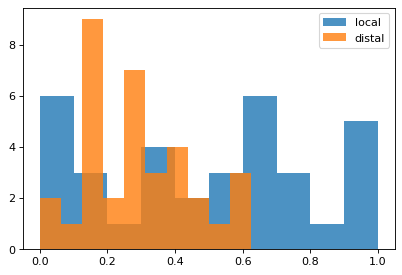

In [74]:
plt.hist(local, label="local", alpha=0.8)
plt.hist(distal, label="distal", alpha=0.8)
plt.legend()
plt.show()

In [75]:

#InCirtuitNodes = df.columns.values[]

In [78]:
df.loc[0,:].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.])

In [104]:
Complete, Local, Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.MaskCortex2Cortexcsv".format(i), names=None)
    InCirtuitNodes = df.columns.values
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, False, False)
    local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, False, False)
    distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, False, False)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print(np.mean(Complete), np.mean(Local), np.mean(Distal))

0.3188506220012396 0.4150582970240224 0.26957693710191544


In [102]:
Complete, Local, Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, False, False)
    local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, False, False)
    distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, False, False)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))

In [103]:
print(np.mean(Complete), np.mean(Local), np.mean(Distal))

0.36415218426412843 0.47525381440123765 0.2921850958076417


In [99]:
complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, True, True)
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, True, True)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, True, True)
print(complete, local, distal)

ZeroDivisionError: division by zero

In [39]:
def ITR(Internal_In, Total_In, Internal_Out, Total_Out):
    return (Internal_In/Total_In) / (Internal_Out/Total_Out)

In [40]:
ITR(4,6,1,9) # Brodcastor

6.0

In [41]:
ITR(1,6,8,9) # Intergrator

0.1875

### 2.3 Cartesian Ipsilateral distance

In [295]:
Local_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv", index_col=0)
Global_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv", index_col=0)
g_local_cartesian = LoadConnectome2(Local_adjmat_cartesian)
g_global_cartesian = LoadConnectome2(Global_adjmat_cartesian)

In [302]:
#Incircuit = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
SparkMeta = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMeta.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMeta = SparkMeta.set_index("STR")
CandidateSTRs = SparkMeta.index.values[:50]
for weighted, directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(weighted, directed))
    #Incircuit_ = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
    local_cohes = ScoreSTRSet(g_local_cartesian, CandidateSTRs, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    glocal_cohes = ScoreSTRSet(g_global_cartesian, CandidateSTRs, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    print("%.3f  %.3f" % (np.mean(local_cohes), np.mean(glocal_cohes)))
    print()

Weighted: False Directed: False
0.444  0.317

Weighted: False Directed: True
0.520  0.462

Weighted: True Directed: False
0.447  0.324

Weighted: True Directed: True
0.524  0.469



In [298]:
for weighted, directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(weighted, directed))
    InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
    Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
        g, g_local_cartesian, g_global_cartesian, EdgeWeightsDict, weighted, directed)
    print("Total  % .3f"% np.mean(Complete))
    print("Local  % .3f"% np.mean(Local))
    print("Distal % .3f"% np.mean(Distal))

Weighted: False Directed: False
Total   0.271
Local   0.330
Distal  0.216
Weighted: False Directed: True
Total   0.366
Local   0.431
Distal  0.317
Weighted: True Directed: False
Total   0.275
Local   0.331
Distal  0.219
Weighted: True Directed: True
Total   0.368
Local   0.432
Distal  0.318


In [301]:
for weighted, directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(weighted, directed))
    InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
    Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
        g, g_local_cartesian, g_global_cartesian, EdgeWeightsDict, weighted, directed)
    print("Total  % .3f"% np.mean(Complete))
    print("Local  % .3f"% np.mean(Local))
    print("Distal % .3f"% np.mean(Distal))

Weighted: False Directed: False
Total   0.317
Local   0.394
Distal  0.237
Weighted: False Directed: True
Total   0.411
Local   0.486
Distal  0.339
Weighted: True Directed: False
Total   0.323
Local   0.395
Distal  0.242
Weighted: True Directed: True
Total   0.413
Local   0.487
Distal  0.340


In [300]:
print(0.44372281462236174/0.330, 0.3171384542585515/0.216)
print(0.5202243916214504/0.330, 0.3171384542585515/0.216)
print(0.44372281462236174/0.330, 0.3171384542585515/0.216)
print(0.44372281462236174/0.330, 0.3171384542585515/0.216)

1.3446145897647326 1.4682335845303311


### 2.4 Expression distance

In [304]:
Local_adjmat_expression = pd.read_csv("../dat/allen-mouse-conn/adj_mat_expression_local.csv", index_col=0)
Global_adjmat_expression = pd.read_csv("../dat/allen-mouse-conn/adj_mat_expression_distal.csv", index_col=0)
g_local_expression = LoadConnectome2(Local_adjmat_expression)
g_global_expression = LoadConnectome2(Global_adjmat_expression)

In [305]:
SparkMeta = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMeta.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMeta = SparkMeta.set_index("STR")
CandidateSTRs = SparkMeta.index.values[:50]
for weighted, directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(weighted, directed))
    local_cohes = ScoreSTRSet(g_local_expression, CandidateSTRs, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    glocal_cohes = ScoreSTRSet(g_global_expression, CandidateSTRs, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    print("%.3f  %.3f" % (np.mean(local_cohes), np.mean(glocal_cohes)))
    print()

Weighted: False Directed: False
0.472  0.235

Weighted: False Directed: True
0.551  0.354

Weighted: True Directed: False
0.482  0.237

Weighted: True Directed: True
0.557  0.354



In [306]:
for weighted, directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(weighted, directed))
    InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
    Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
        g, g_local_expression, g_global_expression, EdgeWeightsDict, weighted, directed)
    print("Total  % .3f"% np.mean(Complete))
    print("Local  % .3f"% np.mean(Local))
    print("Distal % .3f"% np.mean(Distal))

Weighted: False Directed: False
Total   0.271
Local   0.332
Distal  0.221
Weighted: False Directed: True
Total   0.366
Local   0.421
Distal  0.335
Weighted: True Directed: False
Total   0.275
Local   0.337
Distal  0.225
Weighted: True Directed: True
Total   0.368
Local   0.422
Distal  0.336


In [307]:
for weighted, directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(weighted, directed))
    InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
    Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
        g, g_local_expression, g_global_expression, EdgeWeightsDict, weighted, directed)
    print("Total  % .3f"% np.mean(Complete))
    print("Local  % .3f"% np.mean(Local))
    print("Distal % .3f"% np.mean(Distal))

Weighted: False Directed: False
Total   0.317
Local   0.400
Distal  0.229
Weighted: False Directed: True
Total   0.411
Local   0.484
Distal  0.333
Weighted: True Directed: False
Total   0.323
Local   0.403
Distal  0.233
Weighted: True Directed: True
Total   0.413
Local   0.486
Distal  0.336


# 3. ASDp vs NDD

In [77]:
ASD_P_NDD_Split = pd.read_excel("../dat/genes/asd/ASC_ASDpNDD_Split.xlsx")
Spark_Meta = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/dat/genes/asd/spark_Meta_top_genes.xlsx")

In [78]:
ASD_P = ASD_P_NDD_Split[ASD_P_NDD_Split["classifier"]=="ASD_P"]["gene"].values
NDD = ASD_P_NDD_Split[ASD_P_NDD_Split["classifier"]=="ASD_NDD"]["gene"].values 
Spark_Meta_ASDp = Spark_Meta[Spark_Meta["HGNC"].isin(ASD_P)]
Spark_Meta_NDD = Spark_Meta[Spark_Meta["HGNC"].isin(NDD)]

In [79]:
Agg_gene2None, Agg_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta, out = "dat/bias2/meta.gene.weights.csv")
_, ASDp_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta_ASDp, out = None)
_, NDD_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta_NDD, out = None)
Agg_Match = MakeMatchDF(Agg_gene2MutN, N=1000)

/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23126.txt
23126 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/27086.txt
27086 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/287.txt
287 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/7314.txt
7314 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23096.txt
23096 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23392.txt
23392 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/90167.txt
90167 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/293.txt
293 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/58491.txt
58491 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/10847.txt
10847 Not Found in Dataset
/Users/jia

In [80]:
print(len(ASDp_gene2MutN), len(NDD_gene2MutN))

24 34


In [84]:
SA_wd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
weighted = True; directed = True
Incircuit_wd = GetBestCoheSAFil(SA_wd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)

In [87]:
str2reg = STR2Region()
str2reg["Dentate_gyrus"]

'Hippocampal_region'

In [88]:
Incircuit_wd
Incircuit_regions = [str2reg[x] for x in Incircuit_wd]
Incircuit_df = pd.DataFrame(data={"STR":Incircuit_wd, "REG":Incircuit_regions})
Incircuit_df.head(2)

,STR,REG
0,Dentate_gyrus,Hippocampal_region
1,Prelimbic_area,Isocortex


In [89]:
#def oneSTRGeneSet():
   

In [90]:
STR = "Dentate_gyrus"
asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)

In [91]:
G1_Region = ["Isocortex"]
G2_Region = ["Thalamus", "Striatum"]

# ASDp
G1, G2 = [], []
for region in G1_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G1.append(z_dist)
G1 = np.array(G1)        
for region in G2_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G2.append(z_dist)
G1 = np.array(G1)  
G2 = np.array(G2)  
xx_1 = np.mean(G1, axis=0)
xx_2 = np.mean(G2, axis=0)

1.0939422143746094 1.429810191677173 0.765096109079633
wilcoxon 126.0 0.7313888072967529
mannwu 263.0 0.4912362699802683


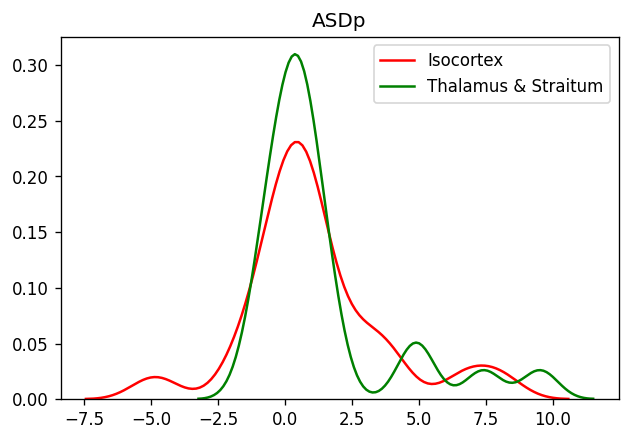

In [92]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="Isocortex", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="Thalamus & Straitum", color=colors[1])
plt.title("ASDp")
from scipy.stats import wilcoxon
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
w, p = wilcoxon(xx_1, xx_2)
print("wilcoxon", w, p)
w, p = mannwhitneyu(xx_1, xx_2)
print("mannwu", w, p)

In [93]:
G1_Region = ["Isocortex"]
G2_Region = ["Thalamus", "Striatum"]

# ASDp
G1, G2 = [], []
for region in G1_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G1.append(z_dist)
G1 = np.array(G1)        
for region in G2_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G2.append(z_dist)
G1 = np.array(G1)  
G2 = np.array(G2)  
xx_1 = np.mean(G1, axis=0)
xx_2 = np.mean(G2, axis=0)

Text(0.5, 1.0, 'NDD')

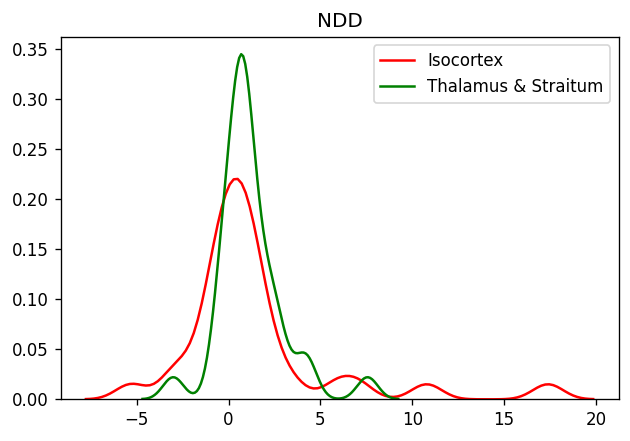

In [94]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="Isocortex", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="Thalamus & Straitum", color=colors[1])
mannwhitneyu(xx_1, xx_2)
plt.title("NDD")

In [95]:
from scipy.stats import wilcoxon
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
w, p = wilcoxon(xx_1, xx_2)
print("wilcoxon", w, p)
w, p = mannwhitneyu(xx_1, xx_2)
print("mannwu", w, p)

1.3544220870836106 1.1973652899847167 1.1311686570611201
wilcoxon 247.0 0.7505744646291802
mannwu 428.0 0.13110831742682938


In [202]:
REGs = list(set(Incircuit_df["REG"].values))
REGs

['Striatum',
 'Thalamus',
 'Isocortex',
 'Hippocampal_formation',
 'Cortical_subplate',
 'Olfactory_areas',
 'Hippocampal_region']

In [205]:
for REG in list(set(Incircuit_df["REG"].values)):
    print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
    tmp_dat_asdp = []
    tmp_dat_ndd = []
    for STR in STRs:
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        tmp_dat_asdp.append(asd_p)
        tmp_dat_ndd.append(asd_ndd)
    tmp_dat_asdp = np.array(tmp_dat_asdp)
    tmp_dat_ndd = np.array(tmp_dat_ndd)
    xx_1 = np.mean(tmp_dat_asdp, axis=0)
    xx_2 = np.mean(tmp_dat_ndd, axis=0)
    print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
    print(mannwhitneyu(xx_1, xx_2))
    print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

Striatum
1.2073628808832506 1.128681788475073 1.0697106068438307
MannwhitneyuResult(statistic=356.0, pvalue=0.42221681756962065)
MannwhitneyuResult(statistic=3147.0, pvalue=0.2934174432205695)
Thalamus
1.5966456747726148 1.2488779161169496 1.278464175054801
MannwhitneyuResult(statistic=352.0, pvalue=0.3957058430106323)
MannwhitneyuResult(statistic=5864.0, pvalue=0.47987716193181584)
Isocortex
1.0939422143746094 1.3544220870836106 0.8076819071447102
MannwhitneyuResult(statistic=340.0, pvalue=0.3194508361420093)
MannwhitneyuResult(statistic=69568.0, pvalue=0.20025227333305184)
Hippocampal_formation
1.1096809018787732 1.277120501254313 0.8688928732949707
MannwhitneyuResult(statistic=364.0, pvalue=0.4761889955322788)
MannwhitneyuResult(statistic=5720.0, pvalue=0.3595450493775452)
Cortical_subplate
1.3048360580262055 1.6162828972914167 0.8073067284278408
MannwhitneyuResult(statistic=356.0, pvalue=0.42221681756962065)
MannwhitneyuResult(statistic=3206.0, pvalue=0.3637244952752816)
Olfactory_

In [210]:
REG="Thalamus"
STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
tmp_dat_asdp = []
tmp_dat_ndd = []
for STR in STRs:
    asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
    asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
    tmp_dat_asdp.append(asd_p)
    tmp_dat_ndd.append(asd_ndd)
tmp_dat_asdp = np.array(tmp_dat_asdp)
tmp_dat_ndd = np.array(tmp_dat_ndd)
xx_1 = np.mean(tmp_dat_asdp, axis=0)
xx_2 = np.mean(tmp_dat_ndd, axis=0)
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
print(mannwhitneyu(xx_1, xx_2))
print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

1.5966456747726148 1.2488779161169496 1.278464175054801
MannwhitneyuResult(statistic=352.0, pvalue=0.3957058430106323)
MannwhitneyuResult(statistic=5864.0, pvalue=0.47987716193181584)


Text(0.5, 1.0, 'Thalamus')

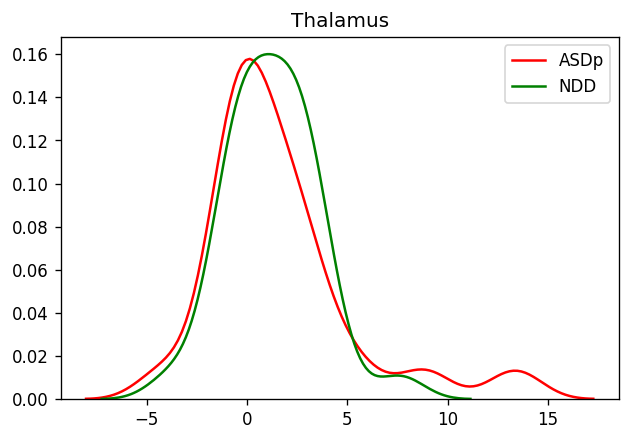

In [211]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="ASDp", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="NDD", color=colors[1])
mannwhitneyu(xx_1, xx_2)
plt.title(REG)

In [208]:
REG="Isocortex"
STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
tmp_dat_asdp = []
tmp_dat_ndd = []
for STR in STRs:
    asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
    asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
    tmp_dat_asdp.append(asd_p)
    tmp_dat_ndd.append(asd_ndd)
tmp_dat_asdp = np.array(tmp_dat_asdp)
tmp_dat_ndd = np.array(tmp_dat_ndd)
xx_1 = np.sum(tmp_dat_asdp, axis=0)
xx_2 = np.sum(tmp_dat_ndd, axis=0)
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
print(mannwhitneyu(xx_1, xx_2))
print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

15.315191001244534 18.96190921917055 0.8076819071447102
MannwhitneyuResult(statistic=340.0, pvalue=0.3194508361420093)
MannwhitneyuResult(statistic=69568.0, pvalue=0.20025227333305184)


Text(0.5, 1.0, 'Isocortex')

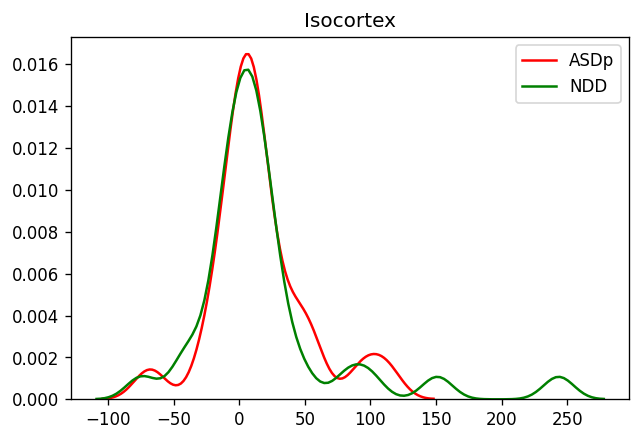

In [209]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="ASDp", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="NDD", color=colors[1])
mannwhitneyu(xx_1, xx_2)
plt.title(REG)

In [197]:
np.mean(xx_1)

15.315191001244534

In [ ]:
    tmp_dat_asdp = np.array(tmp_dat_asdp)
    tmp_dat_ndd = np.array(tmp_dat_ndd)
    xx_1 = np.sum(tmp_dat_asdp, axis=0)
    xx_2 = np.sum(tmp_dat_ndd, axis=0)
    print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
    print(mannwhitneyu(xx_1, xx_2))
    print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

In [194]:
for REG in list(set(Incircuit_df["REG"].values)):
    #print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values

    for STR in STRs:
        #print(REG, STR)
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        bias_1, bias_2 = np.mean(asd_p), np.mean(asd_ndd)
        ratio = bias_1/bias_2
        if ratio > 2 or ratio < 0.5:
            print(REG, STR)
            print(bias_1, bias_2, ratio)
            print(mannwhitneyu(asd_p, asd_ndd))
            print()
        #print(np.mean(asd_p), np.mean(asd_ndd), np.mean(asd_p)/np.mean(asd_ndd))


Thalamus Lateral_posterior_nucleus_of_the_thalamus
2.7143339861684534 0.779528647445773 3.482019544839464
MannwhitneyuResult(statistic=317.0, pvalue=0.19443014205879294)

Thalamus Nucleus_of_reuniens
0.6500364280016345 1.5763445148576292 0.4123695181318558
MannwhitneyuResult(statistic=329.0, pvalue=0.2556132862487377)

Isocortex Infralimbic_area
0.8895732974263292 1.9696716719161798 0.4516353208049719
MannwhitneyuResult(statistic=324.0, pvalue=0.22896962063127257)

Isocortex Retrosplenial_area_lateral_agranular_part
0.6458270265995456 1.4665296804438648 0.440377740192805
MannwhitneyuResult(statistic=343.0, pvalue=0.337956843104302)

Cortical_subplate Basolateral_amygdalar_nucleus
0.6914534249568876 1.6408511080405321 0.42139924918757915
MannwhitneyuResult(statistic=325.0, pvalue=0.23417038834373272)

Olfactory_areas Accessory_olfactory_bulb
1.8434805922153685 0.5769028017032269 3.195478660829421
MannwhitneyuResult(statistic=332.0, pvalue=0.2723438005316339)

Olfactory_areas Taenia_tect

In [34]:
ssc_mutations = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_2.xlsx")

In [35]:
set(ssc_mutations["effectType"].values)

{"3'UTR",
 "3'UTR-intron",
 "5'UTR",
 "5'UTR-intron",
 'frame-shift',
 'intergenic',
 'intron',
 'missense',
 'no-frame-shift',
 'no-frame-shift-newStop',
 'noEnd',
 'noStart',
 'non-coding',
 'non-coding-intron',
 'nonsense',
 'splice-site',
 'synonymous'}

In [36]:
ssc_proband_mut_dat = []
for i, row in ssc_mutations.iterrows():
    if "pM" in row["inChild"] or "pF" in row["inChild"]:
        if row["effectType"] in ["missense", "noStart", "nonsense", "splice-site", "frame-shift"]:
            ssc_proband_mut_dat.append(row)
ssc_proband_mut = pd.DataFrame(data=ssc_proband_mut_dat, columns=ssc_mutations.columns.values)

In [31]:
mutations.head(4)

,familyId,location,variant,vcfVariant,inChild,fromParent,effectGene,effectType,familyDescription,CSHL,YALE,UW,IossifovWE2012,EichlerWE2012,StateWE2012,EichlerTG2012
0,14505,1:897349,sub(G->A),1:897349:G:A,pM,NaN,KLHL17,synonymous,pMsM,NaN,NaN,weak:valid,NaN,NaN,NaN,NaN
1,14320,3:127395222,sub(T->G),3:127395222:T:G,pF,NaN,ABTB1,noStart,pFsM,strong,NaN,NaN,NaN,NaN,NaN,NaN
2,12111,1:1225729,sub(G->A),1:1225729:G:A,sF,NaN,SCNN1D,missense,pMsF,NaN,NaN,strong:valid,NaN,NaN,NaN,NaN
3,11138,1:1230203,sub(G->A),1:1230203:G:A,sM,NaN,ACAP3,intron,pMsM,strong,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ssc_fam_info = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_1.xlsx",
                            index_col="familyId")

In [40]:
ssc_fam_info.head(2)

,collection,probandGender,siblingGender,SequencedAtCSHL,SequencedAtUW,SequencedAtYALE,motherRace,fatherRace,probandVIQ,probandNVIQ,...,fatherAgeInMonthsAtBirthOfProband,motherAgeInMonthsAtBirthOfSibling,fatherAgeInMonthsAtBirthOfSibling,prbRecLGDs,prbLGDs,prbMissense,prbSynonymous,sibLGDs,sibMissense,sibSynonymous
familyId,,,,,,,,,,,,,,,,,,,,,
11542,ssc,F,F,NaN,"p1,s1",NaN,more-than-one-race,white,121.0,102.0,...,430.0,403.0,404.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
13736,ssc,M,M,"p1,s1",NaN,NaN,white,white,119.0,112.0,...,400.0,425.0,429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
for i, row in ssc_proband_mut.iterrows():
    VIQ = ssc_fam_info.loc[row["familyId"], "probandVIQ"]
    NVIQ = ssc_fam_info.loc[row["familyId"], "probandNVIQ"]
    ssc_proband_mut.loc[i, "VIQ"] = VIQ
    ssc_proband_mut.loc[i, "NVIQ"] = NVIQ

In [48]:
Spark_Meta = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/dat/genes/asd/spark_Meta_top_genes.xlsx")
Spark_Meta.shape

(159, 67)

In [49]:
Spark_Meta

,GeneID,EntrezID,HGNC,CytoBand,ExACpLI,LoFOvsE,LOEUF,LOEUFbin,SynOvsE,sHet,...,AllExpected_NDD,pAllEnrich_NDD,MisObserved_NDD,MisExpected_NDD,pMisEnrich_NDD,MisEvents_NDD,MisDist_NDD,pMisCluster_NDD,pMisComb_NDD,pDenovoWEST_NDD
0,ENSG00000143442,23126,POGZ,1q21.3,1,0.045859,0.119,0,0.97057,0.214955,...,0.934605,1e-14,2.44,0.601588,0.00168,9,550.2,0.03,0.000571,1e-14
1,ENSG00000169057,4204,MECP2,Xq28,0.69809,0.085755,0.407,1,2.02820,0.0882034,...,0.18052,1e-14,9.24,0.124697,1e-14,44,131.4,1.01e-08,5.22e-21,5.22e-21
2,ENSG00000136531,6326,SCN2A,2q24.3,1,0.060487,0.127,0,1.00840,0.257771,...,1.88419,1e-14,34.18,1.47464,1e-14,58,1106.6,0.00247,9.7e-16,9.7e-16
3,ENSG00000171862,5728,PTEN,10q23.31,0.97551,0.240930,0.507,2,1.01830,0.12616,...,0.365588,1e-14,14.1,0.273796,1e-14,20,178.5,0.00542,2.09e-15,2.09e-15
4,ENSG00000173575,1106,CHD2,15q26.1,1,0.027031,0.070,0,0.95212,0.172054,...,1.61531,1e-14,8.78,1.11824,1.38e-09,13,410.8,2.4e-05,1.06e-12,1e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,ENSG00000147050,7403,KDM6A,Xp11.3,0.99999,0.070167,0.161,0,0.99117,0.175065,...,0.541389,5.41e-17,2.99,0.340524,2.93e-05,9,513.7,0.01,6.04e-06,5.41e-17
155,ENSG00000117305,3155,HMGCL,1p36.11,0.0025625,0.671950,1.112,6,1.02010,0.0114368,...,0.0576467,0.15,0.16,0.044162,0.08,2,68,0.14,0.06,0.06
156,ENSG00000095951,3096,HIVEP1,6p24.1,0.99999,0.095681,0.173,0,1.01900,0.140793,...,1.36579,0.37,1.47,0.916254,0.15,7,1676,0.31,0.19,0.19
157,ENSG00000177150,125228,FAM210A,18p11.21,0.015124,0.857950,1.450,7,1.01740,0.0202452,...,.,.,.,.,.,.,.,.,.,.


In [50]:
ssc_proband_mut_candidate = ssc_proband_mut[ssc_proband_mut["effectGene"].isin(Spark_Meta["HGNC"].values)]

In [51]:
ssc_proband_mut_candidate

,familyId,location,variant,vcfVariant,inChild,fromParent,effectGene,effectType,familyDescription,CSHL,YALE,UW,IossifovWE2012,EichlerWE2012,StateWE2012,EichlerTG2012,VIQ,NVIQ
108,13545,20:49509095,ins(T),20:49509094:G:GT,pM,NaN,ADNP,frame-shift,pM,NaN,strong:valid,NaN,NaN,NaN,NaN,yes,23.0,38.0
123,12130,20:49510028,del(2),20:49510027:CTT:C,pF,NaN,ADNP,frame-shift,pF,NaN,NaN,strong:valid,NaN,yes,NaN,NaN,62.0,55.0
242,12645,4:114232545,sub(C->T),4:114232545:C:T,pM,NaN,ANK2,nonsense,pMsM,strong:valid,NaN,NaN,yes,NaN,NaN,NaN,94.0,84.0
259,14256,4:114251469,sub(C->T),4:114251469:C:T,pM,NaN,ANK2,nonsense,pMsF,NaN,strong:valid,NaN,NaN,NaN,NaN,NaN,105.0,98.0
264,13768,4:114277600,del(1),4:114277599:AG:A,pM,NaN,ANK2,frame-shift,pMsF,strong,NaN,NaN,NaN,NaN,NaN,NaN,100.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,14204,10:28899669,del(4),10:28899668:AATTC:A,pF,NaN,WAC,frame-shift,pFsF,strong:valid,NaN,NaN,NaN,NaN,NaN,NaN,68.0,57.0
5328,12044,4:85715777,sub(G->A),4:85715777:G:A,pM,NaN,WDFY3,nonsense,pMsM,NaN,strong:valid,NaN,NaN,NaN,NaN,NaN,76.0,75.0
5341,13094,4:85719152,sub(T->A),4:85719152:T:A,pM,NaN,WDFY3,nonsense,pMsM,strong:valid,NaN,NaN,yes,NaN,NaN,NaN,55.0,80.0
5451,12693,22:41572350,sub(C->T),22:41572350:C:T,pM,NaN,EP300,missense,pMsF,strong,NaN,NaN,NaN,NaN,NaN,NaN,97.0,93.0


In [56]:
ssc_proband_mut_candidate.to_csv("dat/ssc_mut_IQ_meta_candidate.csv")

In [53]:
HighIQMuts = ssc_proband_mut_candidate[ssc_proband_mut_candidate["NVIQ"]>70]
LowIQMuts = ssc_proband_mut_candidate[ssc_proband_mut_candidate["NVIQ"]<=70]

In [65]:
HighIQGenes = set(HighIQMuts["effectGene"].values)
len(set(HighIQMuts["effectGene"].values))


58

In [66]:
LowIQGenes = set(LowIQMuts["effectGene"].values)
len(set(LowIQMuts["effectGene"].values))

54

In [70]:
Common_genes = HighIQGenes.intersection(LowIQGenes)
print(len(Common_genes))
HighIQOnly_genes = list(HighIQGenes.difference(LowIQGenes))
print(len(HighIQOnly_genes))
LowIQOnly_genes = list(LowIQGenes.difference(HighIQGenes))
print(len(LowIQOnly_genes))

29
29
25


In [101]:
HighIQEntrez = [GeneSymbol2Entrez[x] for x in HighIQGenes]
LowIQEntrez = [GeneSymbol2Entrez[x] for x in LowIQGenes]
HighIQ_gene2MutN = dict(zip(HighIQEntrez, [1]*len(HighIQEntrez)))
LowIQ_gene2MutN = dict(zip(LowIQEntrez, [1]*len(LowIQEntrez)))

Thalamus
['Lateral_posterior_nucleus_of_the_thalamus' 'Nucleus_of_reuniens'
 'Mediodorsal_nucleus_of_thalamus' 'Submedial_nucleus_of_the_thalamus']
0.3368246780743576 0.24267364081606643 1.3879738934219585
MannwhitneyuResult(statistic=3.0, pvalue=0.09696542614120535)
MannwhitneyuResult(statistic=19938.0, pvalue=0.23468584239974716)


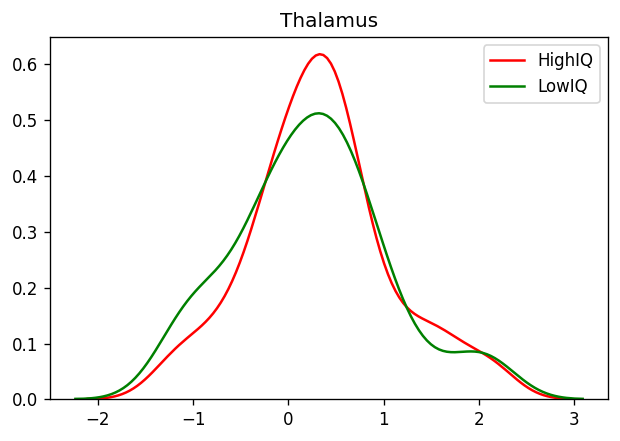

Olfactory_areas
['Dorsal_peduncular_area' 'Anterior_olfactory_nucleus'
 'Accessory_olfactory_bulb' 'Taenia_tecta']
0.2659204157263358 0.28988791599941555 0.9173214923759427
MannwhitneyuResult(statistic=7.0, pvalue=0.44261695723660077)
MannwhitneyuResult(statistic=20190.0, pvalue=0.3043716857780724)


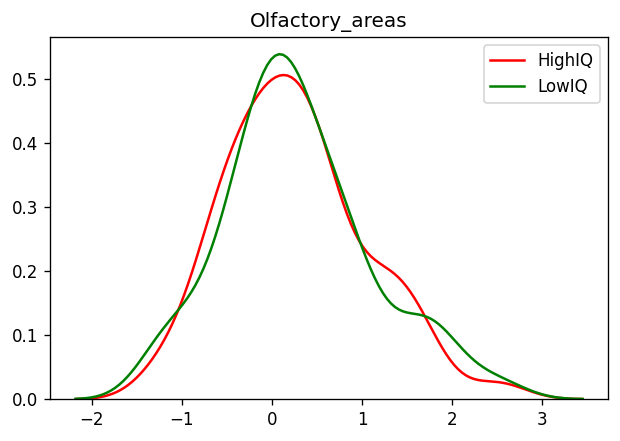

Cortical_subplate
['Claustrum' 'Endopiriform_nucleus_dorsal_part'
 'Basolateral_amygdalar_nucleus']
0.09763141209074157 0.4034079975164734 0.2420165507173782
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=9787.0, pvalue=0.006721181977488384)


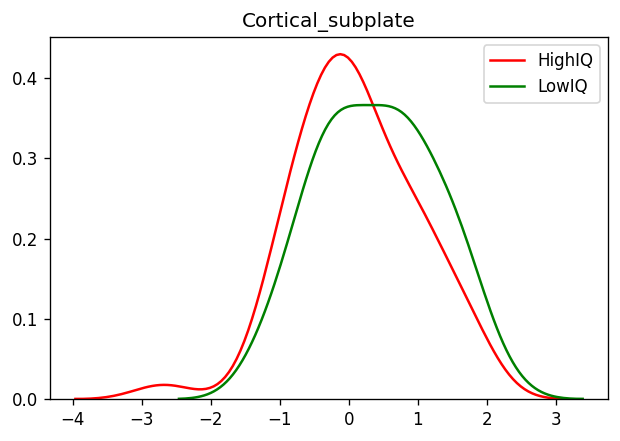

Striatum
['Nucleus_accumbens' 'Lateral_septal_nucleus_rostral_rostroventral_part'
 'Lateral_septal_nucleus_caudal_caudodorsal_part']
0.13498985689350504 0.27158161277988824 0.4970507963030316
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=10427.0, pvalue=0.05002047528657057)


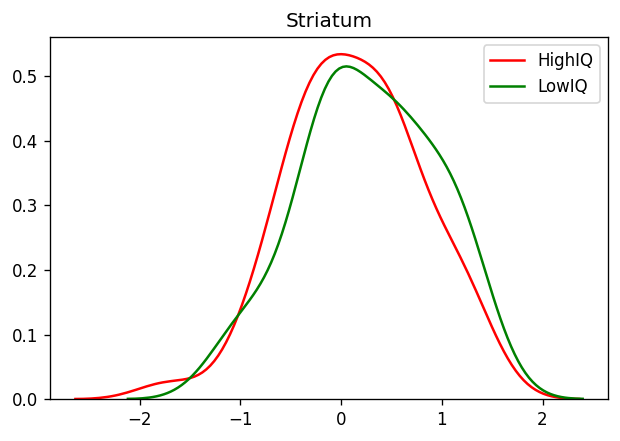

Hippocampal_region
['Dentate_gyrus' 'Field_CA1' 'Field_CA2' 'Field_CA3']
0.3042749919072159 0.41518723224752746 0.7328621120165189
MannwhitneyuResult(statistic=3.0, pvalue=0.09696542614120535)
MannwhitneyuResult(statistic=19353.0, pvalue=0.11222228232781484)


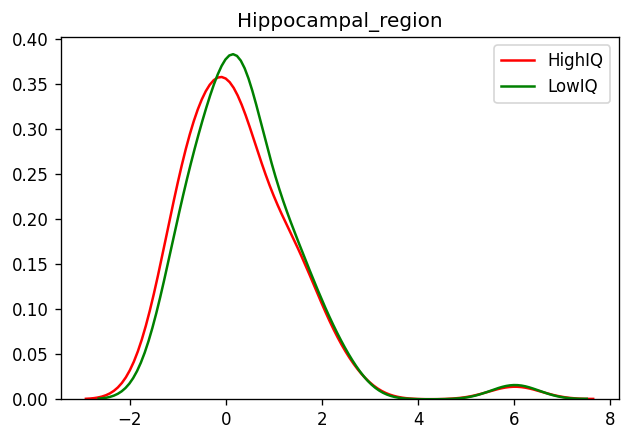

Hippocampal_formation
['Subiculum_ventral_part' 'Subiculum_dorsal_part' 'Parasubiculum'
 'Presubiculum']
0.12621772342286658 0.29171435724351413 0.432675733260204
MannwhitneyuResult(statistic=1.0, pvalue=0.030300984856003035)
MannwhitneyuResult(statistic=18597.0, pvalue=0.03217873213629922)


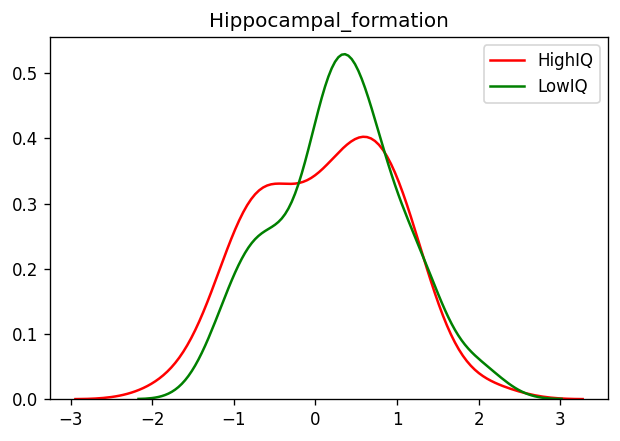

Isocortex
['Prelimbic_area' 'Orbital_area_lateral_part' 'Infralimbic_area'
 'Orbital_area_ventrolateral_part' 'Anterior_cingulate_area_dorsal_part'
 'Primary_visual_area' 'Anteromedial_visual_area'
 'Retrosplenial_area_lateral_agranular_part' 'Orbital_area_medial_part'
 'Secondary_motor_area' 'Anterior_cingulate_area_ventral_part'
 'Agranular_insular_area_ventral_part'
 'Posterior_parietal_association_areas' 'Lateral_visual_area']
0.14262470165985172 0.3112570612972824 0.45822157757773885
MannwhitneyuResult(statistic=21.0, pvalue=0.00021987904338980794)
MannwhitneyuResult(statistic=229707.0, pvalue=0.0006385030863518125)


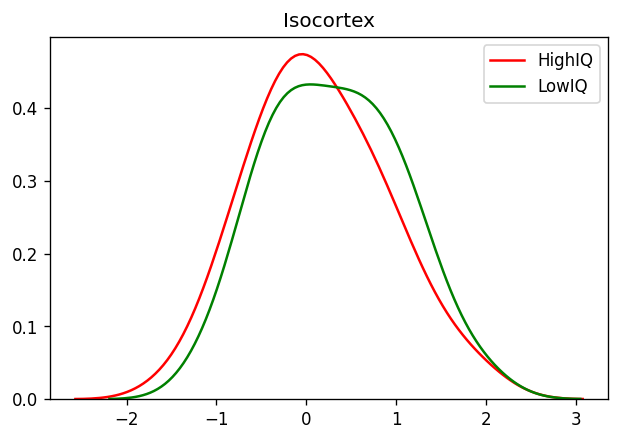

In [111]:
for REG in list(set(Incircuit_df["REG"].values)):
    print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
    print(STRs)
    tmp_dat_asdp = []
    tmp_dat_ndd = []
    for STR in STRs:
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, HighIQ_gene2MutN, Method = 2, 
                                                Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, LowIQ_gene2MutN, Method = 2, 
                                                  Match_DF = Agg_Match)
        tmp_dat_asdp.append(asd_p)
        tmp_dat_ndd.append(asd_ndd)
    tmp_dat_asdp = np.array(tmp_dat_asdp)
    tmp_dat_ndd = np.array(tmp_dat_ndd)
    #print(tmp_dat_asdp.shape, tmp_dat_ndd.shape)
    xx_1 = np.mean(tmp_dat_asdp, axis=0)
    xx_2 = np.mean(tmp_dat_ndd, axis=0)
    #print(len(xx_1), len(xx_2))
    print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
    print(mannwhitneyu(np.mean(tmp_dat_asdp, axis=1), np.mean(tmp_dat_ndd, axis=1)))
    #print(wilcoxon(xx_1, xx_2))
    print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))
    fig = plt.figure(dpi=120)
    colors = ["red", "green", "blue"]
    sns.distplot(a=xx_1, hist=False, label="HighIQ", color=colors[0])
    sns.distplot(a=xx_2, hist=False, label="LowIQ", color=colors[1])
    mannwhitneyu(xx_1, xx_2)
    plt.title(REG)
    plt.show()

In [113]:
for REG in list(set(Incircuit_df["REG"].values)):
    #print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values

    for STR in STRs:
        #print(REG, STR)
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, HighIQ_gene2MutN, Method = 2, 
                                                Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, LowIQ_gene2MutN, Method = 2, 
                                                  Match_DF = Agg_Match)
        
        bias_1, bias_2 = np.mean(asd_p), np.mean(asd_ndd)
        ratio = bias_1/bias_2
        #if ratio > 2 or ratio < 0.5:
        print(REG, STR)
        print(bias_1, bias_2, ratio)
        print(mannwhitneyu(asd_p, asd_ndd))
        print()
        #print(np.mean(asd_p), np.mean(asd_ndd), np.mean(asd_p)/np.mean(asd_ndd))

Thalamus Lateral_posterior_nucleus_of_the_thalamus
0.41122468992679584 0.395700009301666 1.0392334603492375
MannwhitneyuResult(statistic=1283.0, pvalue=0.45602267193758333)

Thalamus Nucleus_of_reuniens
0.24365459250013216 0.14508203222867255 1.6794263821456088
MannwhitneyuResult(statistic=1242.0, pvalue=0.3501435398601562)

Thalamus Mediodorsal_nucleus_of_thalamus
0.38727009081194275 0.22725318964909863 1.7041348964559133
MannwhitneyuResult(statistic=1193.0, pvalue=0.2379343880659736)

Thalamus Submedial_nucleus_of_the_thalamus
0.3051493390585599 0.2026593320848286 1.5057255736480535
MannwhitneyuResult(statistic=1251.0, pvalue=0.3727106562342851)

Olfactory_areas Dorsal_peduncular_area
0.27137182501154256 0.3506125254048385 0.7739935266094677
MannwhitneyuResult(statistic=1249.0, pvalue=0.3676546298452593)

Olfactory_areas Anterior_olfactory_nucleus
0.33702260746625196 0.3519290001304747 0.9576437501351229
MannwhitneyuResult(statistic=1259.0, pvalue=0.39314679378648143)

Olfactory_area

# 4. Replicapable

In [188]:
SEP_DIR = "dat/seperate.bias/"
SparkMeta = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMeta.columns = ["STR", "EFFECT", "Rank", "NGene"]
top50Candidate = set(SparkMeta.head(50)["STR"].values)

In [189]:
Overlap_Top_50 = []
Overlap_with_Final_50 = []
for i in range(1000):
    BiasA = pd.read_csv("{}ASD.Subset.Spec.bias.{}.A.csv".format(SEP_DIR, i))
    BiasB = pd.read_csv("{}ASD.Subset.Spec.bias.{}.B.csv".format(SEP_DIR, i))
    A_top_50 = set(BiasA.head(50)["STR"].values)
    B_top_50 = set(BiasB.head(50)["STR"].values)
    overl_lap_top_50 = len(A_top_50.intersection(B_top_50))
    Overlap_Top_50.append(overl_lap_top_50)
    
    Overlap_with_Final_50.append(len(A_top_50.intersection(top50Candidate)))
    Overlap_with_Final_50.append(len(B_top_50.intersection(top50Candidate)))

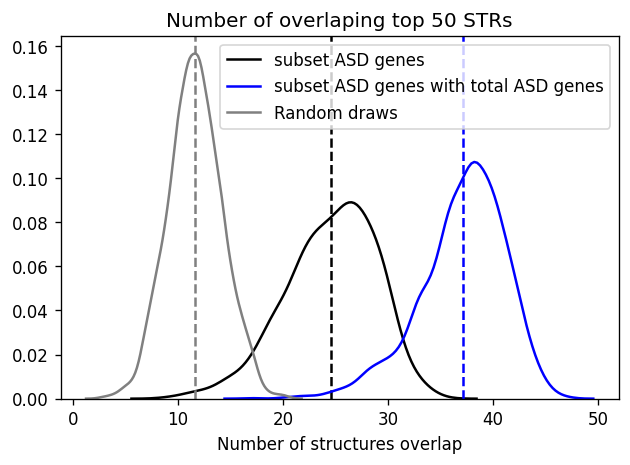

In [197]:
fig = plt.figure(dpi=120)
sns.distplot(a=Overlap_Top_50, hist=False, color="black", label="subset ASD genes")
plt.axvline(x=np.mean(Overlap_Top_50), c="black", linestyle="--")

sns.distplot(a=Overlap_with_Final_50, hist=False, color="blue", label="subset ASD genes with total ASD genes")
plt.axvline(x=np.mean(Overlap_with_Final_50), c="blue", linestyle="--")

sns.distplot(a=trails, hist=False, color="grey", label="Random draws")
plt.axvline(x=np.mean(trails), c="grey", linestyle="--")
plt.title("Number of overlaping top 50 STRs")
plt.legend()
plt.xlabel("Number of structures overlap")
plt.show()

In [196]:
print(np.mean(Overlap_Top_50), np.mean(trails), np.mean(Overlap_with_Final_50))

24.571 11.634 37.129


In [193]:
trails = []
for i in range(1000):
    A = np.random.choice(range(213), size=50, replace=False)
    B = np.random.choice(range(213), size=50, replace=False)
    common = len(set(A).intersection(set(B)))
    trails.append(common)

Text(0.5, 1.0, 'Number of overlaping top 50 STRs')

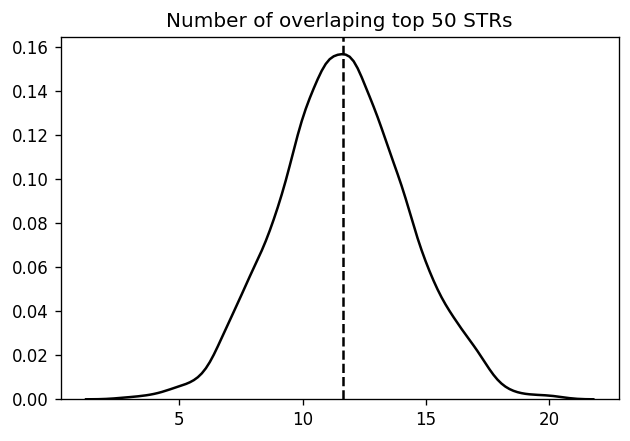

In [194]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=trails, hist=False, color="black")
plt.axvline(x=np.mean(trails), c="black", linestyle="--")
plt.title("Number of overlaping top 50 STRs")

In [237]:
SUP_DIR = "dat/subsample.bias/"
Overlap_Mat = []
Overlap_with_Final_50 = []
for i in range(10, 100, 10):
    xx = []
    for j in range(1000):
        SubBias = pd.read_csv("{}Subsample.Spec.bias.{}.{}.csv".format(SUP_DIR, j, i))
        Sub_top_50 = set(SubBias.head(50)["STR"].values)
        xx.append(len(Sub_top_50.intersection(top50Candidate)))
    Overlap_Mat.append(xx)
Overlap_Mat = np.array(Overlap_Mat)

In [239]:
dat = Overlap_Mat.mean(axis=1)
stds = []
for i in range(9):
    stds.append(np.std(Overlap_Mat[i, :]))
stds = np.array(stds)

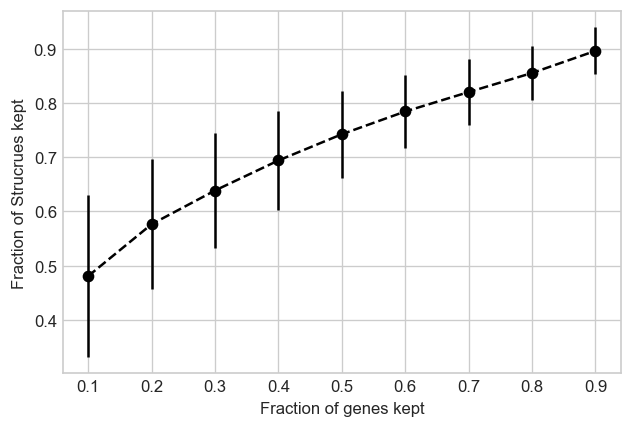

In [291]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(dpi=120)
plt.errorbar(np.arange(0.1, 1.0, 0.1), dat/50, yerr=stds/50, fmt='ok--', )
plt.xlabel("Fraction of genes kept")
plt.ylabel("Fraction of Strucrues kept")
plt.savefig("figs/Fraction_gene_Fraction_Structures.pdf")

# SA on Long Distance

In [289]:
# Anly cortical_cortical connections

In [2]:
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")

<AxesSubplot:>

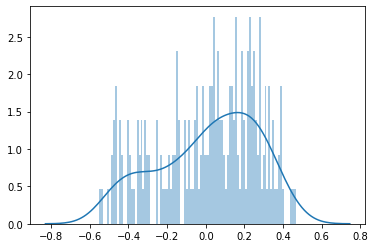

In [28]:
sns.distplot(a=SparkMetaBias["EFFECT"].values, hist=True, bins=100)

In [12]:
random_state = np.random.RandomState(seed=1)
X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

In [15]:
X.shape

(1000, 1)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/jiayao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/jiayao/anaconda3/lib/python3.7/site-pac

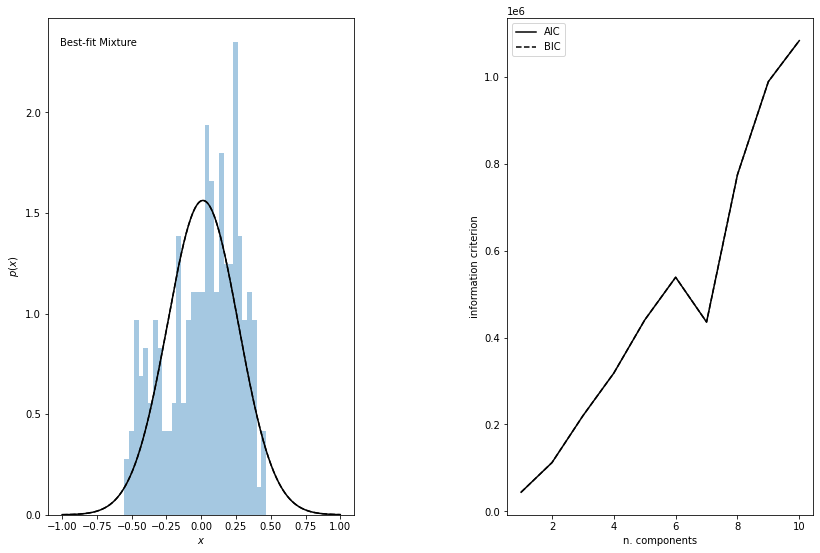

In [26]:
from sklearn.mixture import GaussianMixture
X_train = SparkMetaBias["EFFECT"].values.reshape(-1,1)
#gmm = GaussianMixture(3).fit(X_train)
N = np.arange(1, 11)
models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X_train)
    
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)

ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-1, 1, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X_train, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)



# 3 Tiers of circuits

In [39]:
## 
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")

g = LoadConnectome2() # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()

InfoDict = pk.load(open("dat/EdgeDict_selfInfo.pk", 'rb'))
UnifDict = pk.load(open("dat/EdgeDict_Uniform.pk", 'rb'))

In [40]:
CirSTRs_T1, cohe, conn = GreedyTrim(SparkMetaBias, g, 50, UnifDict)
print(len(CirSTRs_T1), cohe, conn)
print(RegionDistributionsList(CirSTRs_T1))
CirSTRs_T2, cohe, conn = GreedyTrim(SparkMetaBias, g, 90, InfoDict)
print(len(CirSTRs_T2), cohe, conn)
print(RegionDistributionsList(CirSTRs_T2))

38 0.383745229264481 263
Cortical_subplate 	 3 	 Basolateral_amygdalar_nucleus; Claustrum; Endopiriform_nucleus_dorsal_part
Hippocampal_region 	 4 	 Field_CA1; Field_CA2; Field_CA3; Dentate_gyrus
Hippocampal_formation 	 1 	 Subiculum_dorsal_part
Olfactory_areas 	 3 	 Accessory_olfactory_bulb; Anterior_olfactory_nucleus; Dorsal_peduncular_area
Striatum 	 3 	 Nucleus_accumbens; Caudoputamen; Lateral_septal_nucleus_caudal_caudodorsal_part
Isocortex 	 19 	 Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Agranular_insular_area_posterior_part; Agranular_insular_area_ventral_part; Frontal_pole_cerebral_cortex; Gustatory_areas; Infralimbic_area; Primary_motor_area; Secondary_motor_area; Orbital_area_lateral_part; Orbital_area_medial_part; Orbital_area_ventrolateral_part; Prelimbic_area; Posterior_parietal_association_areas; Retrosplenial_area_lateral_agranular_part; Visceral_area; Anteromedial_visual_area; Lateral_visual_area; Primary_visual_area
Thalamus 	 5 	 Later

In [44]:
List2Fil(CirSTRs_T1, "dat/CircuitSTRs.38.txt")

In [35]:
# Annotate graph

# Annotate Region to Node
for i in enumerate(g.vs):
    label_ = g.vs[i]["label"][0]
    g.vs[i]["region"] = str2reg[label_]
    g.vs[i]["Bias"] = SparkMetaBias.loc[label_, "EFFECT"]
    g.vs[i]["Bias_Rank"] = SparkMetaBias.loc[label_, "Rank"]
    
    if label_ in CirSTRs_T1:
        g.vs[i]["Tier"] = 1
    elif label_ in CirSTRs_T2:
        g.vs[i]["Tier"] = 2
    else:
        g.vs[i]["Tier"] = 3

In [36]:
g.write_gml("circuit_STRs.3Tiers.gml")

# XX

In [ ]:
slices = [10, 25, 50, 100, 150, 200]
for topN in slices:
    asd
    
    http://www.jtrive.com/the-empirical-bootstrap-for-confidence-intervals-in-python.html

In [18]:
g_ = g.copy()
top_structs = meta_jon.head(50).index
top_nodes = g.vs.select(label_in=top_structs)
g2 = g_.subgraph(top_nodes)
graph_size, exp_stats, exp_graphs, trimmed_Vs = CircuitTrimming(g2, g_, EdgeWeightsDict)
idx = np.argmax(exp_stats[:50-10])

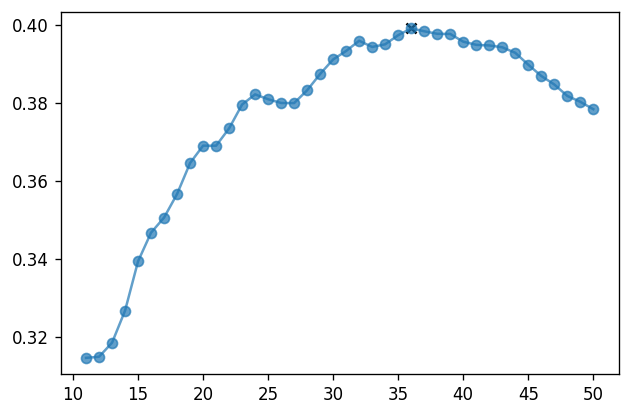

In [19]:
fig, ax = plt.subplots(dpi=120)
ax.scatter(50-idx, exp_stats[idx], marker='x', color="black")
ax.plot(graph_size, exp_stats, marker="o", label='XX', alpha=0.7)

# Neuro Density

In [2]:
def modify_str(x):
    x = re.sub("[()]", "", x)
    x = re.sub("-", "_", x)
    x = re.sub("reunions", "reuniens", x)
    x = "_".join(x.split(" "))
    return x

cell_comp = pd.read_csv("../dat/cell_composition/Cell_Atlas_for_the_Mouse_brain_2.csv", index_col="Regions")
STRs = cell_comp.index.values
STRs = [modify_str(x) for x in STRs]
cell_comp.index = STRs

STRs = [x.strip() for x in open("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/Structures.txt", 'rt')]
STR_cell_comp = cell_comp[cell_comp.index.isin(STRs)]

In [38]:
STR_cell_comp.head(5)

,Cells [mm-3],Neurons [mm-3],Glia [mm-3],Excitatory [mm-3],Inhibitory [mm-3],Modulatory [mm-3],Astrocytes [mm-3],Oligodendrocytes [mm-3],Microglia [mm-3]
Frontal_pole_cerebral_cortex,75406.157163,46677.918868,28728.238294,9082.524910,37317.769540,277.624418,736.966638,9903.620159,18087.651497
Primary_motor_area,139973.711601,65189.475782,74784.235819,56924.507483,7669.354996,595.613303,12345.803170,37286.693355,25151.739294
Secondary_motor_area,143569.821165,65792.200510,77777.620656,53895.137204,11202.789189,694.274116,8852.555741,31674.562056,37250.502859
Primary_somatosensory_area_nose,140706.633074,66579.208520,74127.424554,59187.308154,7056.737042,335.163324,7223.614580,31560.274169,35343.535806
Primary_somatosensory_area_barrel_field,172443.055261,81340.096570,91102.958690,74812.410510,6139.549730,388.136331,8885.893712,38191.439356,44025.625622


In [39]:
X = STR_cell_comp["Neurons [mm-3]"]/STR_cell_comp["Glia [mm-3]"]
Y = STR_cell_comp["Neurons [mm-3]"]

In [11]:
exp_level = pd.read_csv("../dat/allen-mouse-exp/jon/exp_level-before_norm.csv", 
                           index_col="ROW")

In [12]:
exp_level_norm = pd.read_csv("../dat/allen-mouse-exp/jon/exp_level-after_norm.csv", 
                           index_col="ROW")

In [15]:
exp_level.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.129948,0.060500,0.063547,0.046318,0.029235,0.283072,0.026315,NaN,0.072782,0.058972,...,0.031173,0.242497,0.007004,0.104897,0.272817,0.107278,0.140856,0.109031,0.251835,0.214892
2,0.065605,0.012055,0.030225,0.048060,0.375491,0.102894,0.228004,0.093791,0.174076,0.046022,...,0.040116,0.016684,0.171418,0.158988,0.112546,0.051621,0.059596,0.112288,0.274680,1.004292


In [17]:
df = exp_level.copy(deep=True)
for c in df.columns.values:
    neuro_count = cell_comp.loc[c, "Neurons [mm-3]"]
    df[c] = (df[c]/neuro_count) * (10**5)
#for c in df.columns.values:
#    df[c] = np.log2(1+df[c])
#df = quantileNormalize(df)
df.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.233497,0.091585,0.072887,0.068692,0.022901,0.326320,0.037476,NaN,0.10471,0.113484,...,0.031096,0.243862,0.004891,0.152431,0.202784,0.176109,0.184969,0.151189,0.421967,0.379667
2,0.117883,0.018249,0.034667,0.071275,0.294132,0.118614,0.324707,0.122315,0.25044,0.088562,...,0.040017,0.016778,0.119701,0.231033,0.083655,0.084742,0.078260,0.155704,0.460245,1.774368


In [18]:
exp_level_norm.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.000002,9.158517e-07,7.288737e-07,6.869156e-07,2.290073e-07,0.000003,3.747620e-07,NaN,0.000001,1.134837e-06,...,3.109636e-07,2.438624e-06,4.890943e-08,0.000002,2.027842e-06,1.761087e-06,1.849691e-06,0.000002,0.000004,0.000004
2,0.000001,1.824927e-07,3.466743e-07,7.127489e-07,2.941320e-06,0.000001,3.247072e-06,0.000001,0.000003,8.856233e-07,...,4.001734e-07,1.677800e-07,1.197012e-06,0.000002,8.365509e-07,8.474180e-07,7.826042e-07,0.000002,0.000005,0.000018


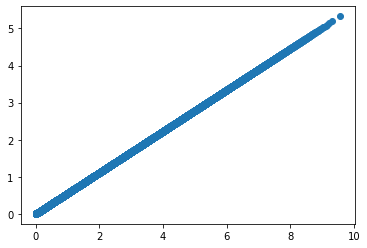

In [19]:
X = df["Anterior_amygdalar_area"].values
Y = exp_level["Anterior_amygdalar_area"].values
plt.scatter(X, Y)

In [20]:
df_z = []
for i in df.index.values :
    i_z = ZscoreConverting(df.loc[i,:].values)
    df_z.append(i_z)
df_z = pd.DataFrame(data=df_z, columns=df.columns.values, index=df.index.values)
df_z.to_csv("../dat/allen-mouse-exp/energy-zscore-conn-model.0920.neuronorm.csv")

In [21]:
df_z.head(3)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
1,0.513725,-0.500244,-0.633841,-0.663820,-0.990999,1.176951,-0.886856,NaN,-0.406467,-0.343777,...,-0.932440,0.587788,-1.119680,-0.065497,0.294281,0.103683,0.166991,-0.074372,1.860357,1.558125
2,-0.392014,-0.644293,-0.602721,-0.510029,0.054262,-0.390163,0.131681,-0.380792,-0.056368,-0.466255,...,-0.589175,-0.648019,-0.387410,-0.105509,-0.478681,-0.475929,-0.492341,-0.296247,0.474874,3.802329
9,0.120121,-0.412344,-0.467384,-0.364137,-0.410832,-0.366519,-0.379600,-0.432471,-0.362936,0.409538,...,-0.457181,-0.453966,-0.462623,-0.422174,0.073426,-0.348585,-0.358136,-0.293363,-0.131883,0.273403


In [30]:
Bias1 = pd.read_csv("dat/bias2/ASD.Meta.Spec.bias.csv", index_col="STR")
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")
Bias1 = SparkMetaBias
Bias2 = pd.read_csv("dat/bias2/ASD.Meta.Spec.norm.bias.csv", index_col="STR")

In [37]:
RD_Agg_avgZ_RD = RegionDistributions(SparkMetaBias, topN=25, show=True)

Striatum 	 1 	 Nucleus_accumbens
Amygdalar 	 3 	 Lateral_amygdalar_nucleus; Basomedial_amygdalar_nucleus; Intercalated_amygdalar_nucleus
Hippocampal_formation 	 2 	 Subiculum_ventral_part; Subiculum_dorsal_part
Thalamus 	 1 	 Lateral_posterior_nucleus_of_the_thalamus
Isocortex 	 8 	 Orbital_area_lateral_part; Prelimbic_area; Orbital_area_ventrolateral_part; Infralimbic_area; Anteromedial_visual_area; Primary_somatosensory_area_lower_limb; Primary_visual_area; Agranular_insular_area_ventral_part
Midbrain 	 1 	 Anterior_pretectal_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Olfactory_areas 	 3 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb
Cortical_subplate 	 2 	 Claustrum; Endopiriform_nucleus_dorsal_part


In [36]:
RD_Agg_avgZ_RD = RegionDistributions(Bias2, topN=25, show=True)

Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Hippocampal_formation 	 2 	 Subiculum_ventral_part; Subiculum_dorsal_part
Thalamus 	 1 	 Lateral_posterior_nucleus_of_the_thalamus
Isocortex 	 12 	 Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Prelimbic_area; Infralimbic_area; Anterior_cingulate_area_dorsal_part; Primary_motor_area; Frontal_pole_cerebral_cortex; Secondary_motor_area; Primary_somatosensory_area_lower_limb; Anteromedial_visual_area; Agranular_insular_area_ventral_part; Orbital_area_medial_part
Midbrain 	 1 	 Anterior_pretectal_nucleus
Hippocampal_region 	 1 	 Field_CA1
Olfactory_areas 	 2 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus
Pallidum 	 1 	 Substantia_innominata
Cortical_subplate 	 3 	 Endopiriform_nucleus_dorsal_part; Endopiriform_nucleus_ventral_part; Claustrum


(0.853128191217745, 1.5259591593927835e-61)
SpearmanrResult(correlation=0.8822785061630584, pvalue=5.591558593795965e-71)


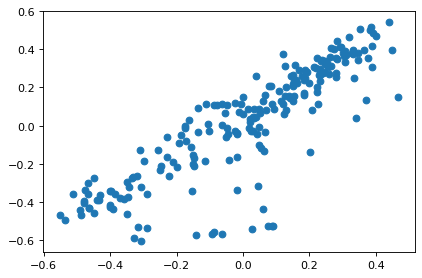

In [31]:
dat1, dat2 = [], []
for STR in Bias1.index.values:
    bias1 = Bias1.loc[STR, "EFFECT"]
    bias2 = Bias2.loc[STR, "EFFECT"]
    dat1.append(bias1)
    dat2.append(bias2)
plt.scatter(dat1, dat2)
print(pearsonr(dat1, dat2))
print(spearmanr(dat1, dat2))

In [32]:
# overlap for top 50
SetA = set(Bias1.head(50).index.values)
SetB = set(Bias2.head(50).index.values)
print(len(SetA.intersection(SetB)))

41


In [33]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
g = LoadConnectome2(adj_mat) # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")

In [34]:
EdgeWeightsDict = {}
topNs = list(range(200, 10, -5))
ASD_Conn_Z, ASD_Cohe_Z, ASD_Conn_P, ASD_Cohe_P, ASD_Conn_E, ASD_Cohe_E = [],[],[],[],[],[]
Sib_Conn_Z, Sib_Cohe_Z, Sib_Conn_P, Sib_Cohe_P, Sib_Conn_E, Sib_Cohe_E = [],[],[],[],[],[]
for topN in topNs:
    Permuted_ASD_cohe = []
    Permuted_ASD_conn = []
    Permuted_Sib_cohe = []
    Permuted_Sib_conn = []
    for i in range(1000):
        adj_mat_perm = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
        g_perm = LoadConnectome2(adj_mat_perm)
        asd_cohe, asd_conn = ScoreSTRSet(g_perm, Bias1.head(topN).index.values, EdgeWeightsDict)
        sib_cohe, sib_conn = ScoreSTRSet(g_perm, Bias2.head(topN).index.values, EdgeWeightsDict)
        Permuted_ASD_cohe.append(asd_cohe)
        Permuted_ASD_conn.append(asd_conn)
        Permuted_Sib_cohe.append(sib_cohe)
        Permuted_Sib_conn.append(sib_conn)
    asd_cohe, asd_conn = ScoreSTRSet(g, Bias1.head(topN).index.values, EdgeWeightsDict)
    sib_cohe, sib_conn = ScoreSTRSet(g, Bias2.head(topN).index.values, EdgeWeightsDict)
    
    asd_z_conn, asd_p_conn = GetPermutationP(Permuted_ASD_conn, asd_conn)
    asd_z_cohe, asd_p_cohe = GetPermutationP(Permuted_ASD_cohe, asd_cohe)
    effect_conn = asd_conn/np.mean(Permuted_ASD_conn)
    effect_cohe = asd_cohe/np.mean(Permuted_ASD_cohe)
    ASD_Conn_Z.append(asd_z_conn); ASD_Cohe_Z.append(asd_z_cohe)
    ASD_Conn_P.append(asd_p_conn); ASD_Cohe_P.append(asd_p_cohe)
    ASD_Conn_E.append(effect_conn); ASD_Cohe_E.append(effect_cohe)
    
    sib_z_conn, sib_p_conn = GetPermutationP(Permuted_Sib_conn, sib_conn)
    sib_z_cohe, sib_p_cohe = GetPermutationP(Permuted_Sib_cohe, sib_cohe)
    effect_conn = sib_conn/np.mean(Permuted_Sib_conn)
    effect_cohe = sib_cohe/np.mean(Permuted_Sib_cohe)
    Sib_Conn_Z.append(sib_z_conn); Sib_Cohe_Z.append(sib_z_cohe)
    Sib_Conn_P.append(sib_p_conn); Sib_Cohe_P.append(sib_p_cohe)
    Sib_Conn_E.append(effect_conn); Sib_Cohe_E.append(effect_cohe)

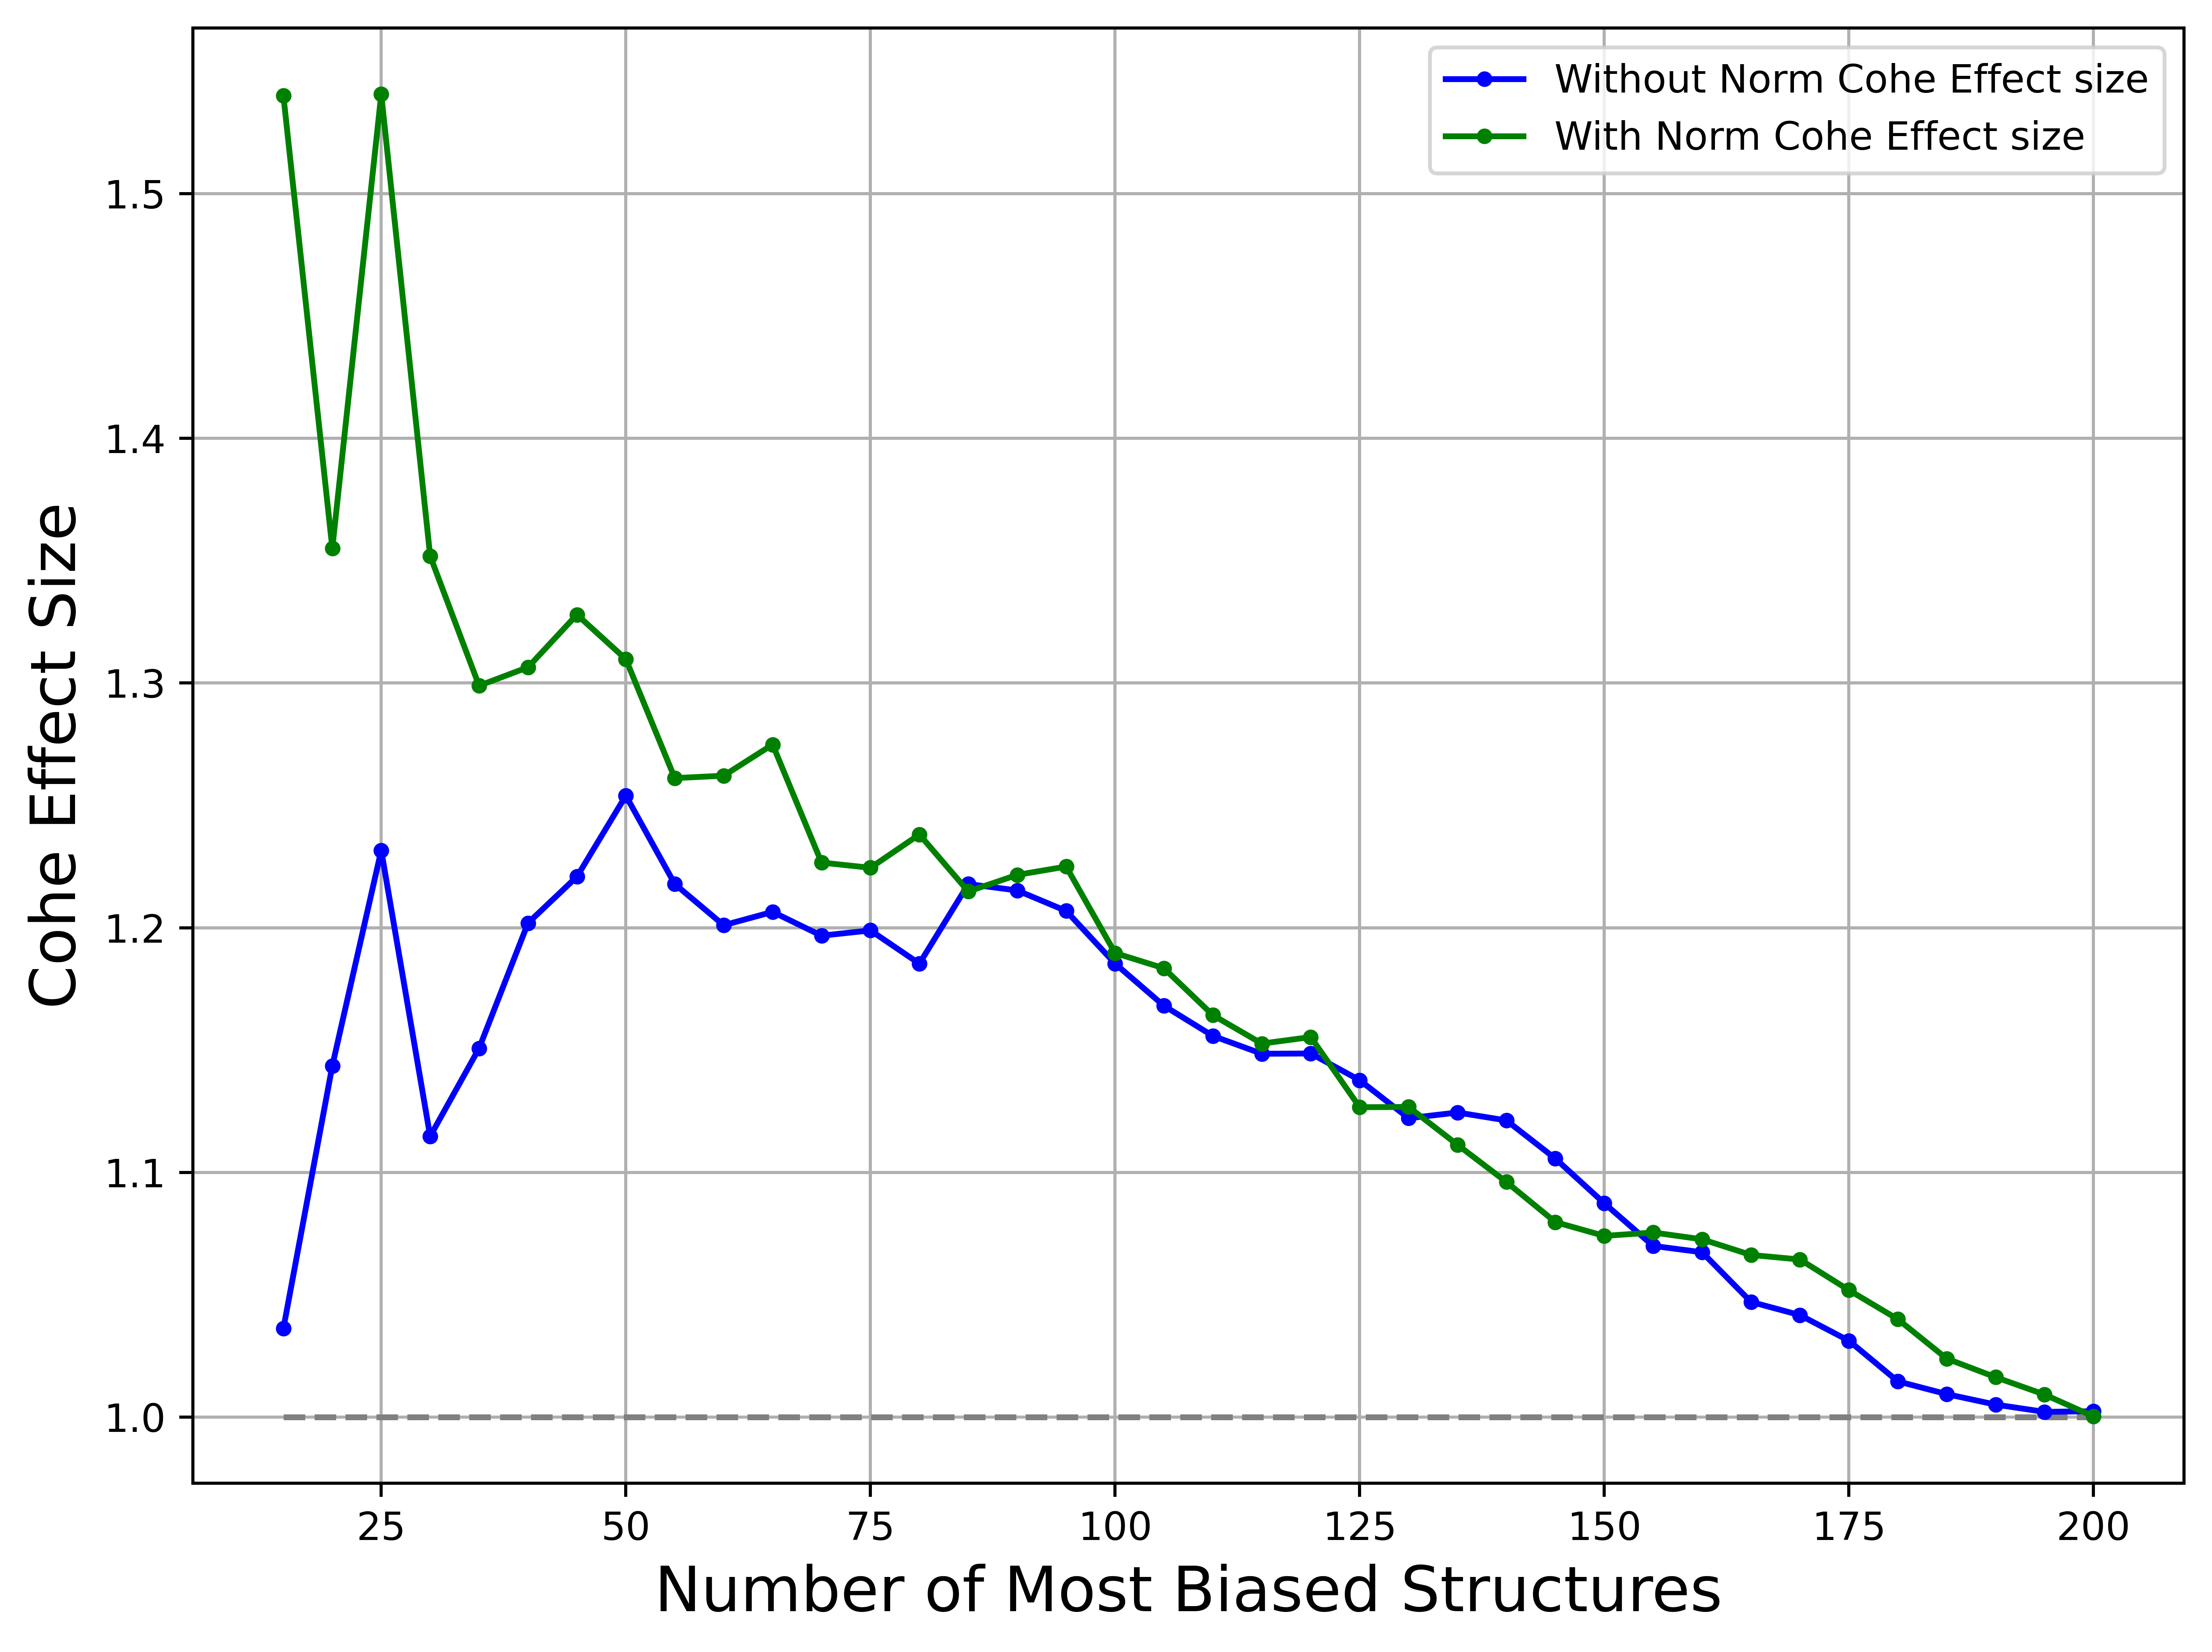

In [35]:
ASD_Conn_P = np.array(ASD_Conn_P)
fig, ax = plt.subplots(dpi=720, figsize=(8,6))

ax.plot(topNs, ASD_Cohe_E, label="Without Norm Cohe Effect size", marker=".", color="blue")
ax.plot(topNs, Sib_Cohe_E, label="With Norm Cohe Effect size", marker=".", color="green")

ax.hlines(xmin=min(topNs), xmax=max(topNs), y=1, ls="--", color="grey")
ax.grid(True)
ax.legend()
ax.set_ylabel("Cohe Effect Size",fontsize=16)
ax.set_xlabel("Number of Most Biased Structures",fontsize=16)


plt.tight_layout()

### Neuro-glia ratio

In [42]:
STR_cell_comp["NG_ratio"] = STR_cell_comp["Neurons [mm-3]"]/STR_cell_comp["Glia [mm-3]"]

/Users/jiayao/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [46]:
df = exp_level.copy(deep=True)
for c in df.columns.values:
    neuro_count = STR_cell_comp.loc[c, "NG_ratio"]
    print(neuro_count)
    df[c] = (df[c]/neuro_count) 
df.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.133513,0.072474,0.052336,0.040542,0.022615,0.197361,0.019634,NaN,0.054468,0.071626,...,0.026020,0.195513,0.002921,0.099198,0.161245,0.119112,0.135001,0.107147,0.271541,0.298321
2,0.067405,0.014441,0.024893,0.042067,0.290457,0.071739,0.170117,0.054643,0.130274,0.055897,...,0.033485,0.013452,0.071478,0.150350,0.066519,0.057316,0.057119,0.110347,0.296174,1.394198


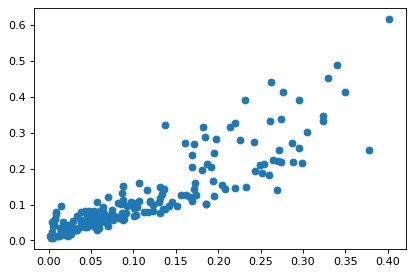

In [54]:
X = df.loc[1,:].values
Y = exp_level.loc[1,:].values
plt.scatter(X, Y)

In [47]:
df_z = []
for i in df.index.values :
    i_z = ZscoreConverting(df.loc[i,:].values)
    df_z.append(i_z)
df_z = pd.DataFrame(data=df_z, columns=df.columns.values, index=df.index.values)
df_z.to_csv("../dat/allen-mouse-exp/energy-zscore-conn-model.0920.n2g-norm.csv")

In [48]:
df_z.head(3)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
1,0.250581,-0.403647,-0.619493,-0.745901,-0.938055,0.934918,-0.970000,NaN,-0.596641,-0.412740,...,-0.901550,0.915117,-1.149140,-0.117217,0.547818,0.096230,0.266531,-0.032019,1.730006,2.017040
2,-0.434007,-0.599223,-0.566621,-0.513047,0.261785,-0.420489,-0.113606,-0.473818,-0.237891,-0.469907,...,-0.539817,-0.602310,-0.421301,-0.175267,-0.436772,-0.465480,-0.466094,-0.300054,0.279619,3.704814
9,0.071986,-0.433345,-0.510120,-0.405958,-0.409202,-0.405636,-0.432886,-0.486829,-0.418434,0.451115,...,-0.493597,-0.490230,-0.506883,-0.459907,0.238764,-0.370983,-0.371298,-0.295791,-0.135734,0.503023


In [49]:
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")
Bias1 = SparkMetaBias
Bias2 = pd.read_csv("dat/bias2/ASD.Meta.Spec.norm2.bias.csv", index_col="STR")

(0.993541002133068, 2.113245544490383e-201)
SpearmanrResult(correlation=0.9917147036690251, pvalue=4.929743527479258e-190)


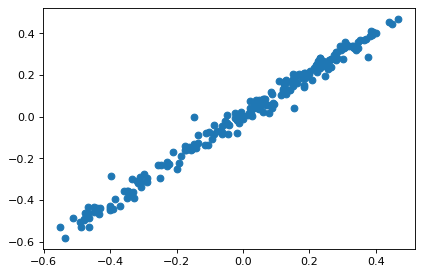

In [50]:
dat1, dat2 = [], []
for STR in Bias1.index.values:
    bias1 = Bias1.loc[STR, "EFFECT"]
    bias2 = Bias2.loc[STR, "EFFECT"]
    dat1.append(bias1)
    dat2.append(bias2)
plt.scatter(dat1, dat2)
print(pearsonr(dat1, dat2))
print(spearmanr(dat1, dat2))

In [55]:
# overlap for top 50
SetA = set(Bias1.head(50).index.values)
SetB = set(Bias2.head(50).index.values)
print(len(SetA.intersection(SetB)))

45


In [56]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
g = LoadConnectome2(adj_mat) # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")

In [57]:
EdgeWeightsDict = {}
topNs = list(range(200, 10, -5))
ASD_Conn_Z, ASD_Cohe_Z, ASD_Conn_P, ASD_Cohe_P, ASD_Conn_E, ASD_Cohe_E = [],[],[],[],[],[]
Sib_Conn_Z, Sib_Cohe_Z, Sib_Conn_P, Sib_Cohe_P, Sib_Conn_E, Sib_Cohe_E = [],[],[],[],[],[]
for topN in topNs:
    Permuted_ASD_cohe = []
    Permuted_ASD_conn = []
    Permuted_Sib_cohe = []
    Permuted_Sib_conn = []
    for i in range(1000):
        adj_mat_perm = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
        g_perm = LoadConnectome2(adj_mat_perm)
        asd_cohe, asd_conn = ScoreSTRSet(g_perm, Bias1.head(topN).index.values, EdgeWeightsDict)
        sib_cohe, sib_conn = ScoreSTRSet(g_perm, Bias2.head(topN).index.values, EdgeWeightsDict)
        Permuted_ASD_cohe.append(asd_cohe)
        Permuted_ASD_conn.append(asd_conn)
        Permuted_Sib_cohe.append(sib_cohe)
        Permuted_Sib_conn.append(sib_conn)
    asd_cohe, asd_conn = ScoreSTRSet(g, Bias1.head(topN).index.values, EdgeWeightsDict)
    sib_cohe, sib_conn = ScoreSTRSet(g, Bias2.head(topN).index.values, EdgeWeightsDict)
    
    asd_z_conn, asd_p_conn = GetPermutationP(Permuted_ASD_conn, asd_conn)
    asd_z_cohe, asd_p_cohe = GetPermutationP(Permuted_ASD_cohe, asd_cohe)
    effect_conn = asd_conn/np.mean(Permuted_ASD_conn)
    effect_cohe = asd_cohe/np.mean(Permuted_ASD_cohe)
    ASD_Conn_Z.append(asd_z_conn); ASD_Cohe_Z.append(asd_z_cohe)
    ASD_Conn_P.append(asd_p_conn); ASD_Cohe_P.append(asd_p_cohe)
    ASD_Conn_E.append(effect_conn); ASD_Cohe_E.append(effect_cohe)
    
    sib_z_conn, sib_p_conn = GetPermutationP(Permuted_Sib_conn, sib_conn)
    sib_z_cohe, sib_p_cohe = GetPermutationP(Permuted_Sib_cohe, sib_cohe)
    effect_conn = sib_conn/np.mean(Permuted_Sib_conn)
    effect_cohe = sib_cohe/np.mean(Permuted_Sib_cohe)
    Sib_Conn_Z.append(sib_z_conn); Sib_Cohe_Z.append(sib_z_cohe)
    Sib_Conn_P.append(sib_p_conn); Sib_Cohe_P.append(sib_p_cohe)
    Sib_Conn_E.append(effect_conn); Sib_Cohe_E.append(effect_cohe)

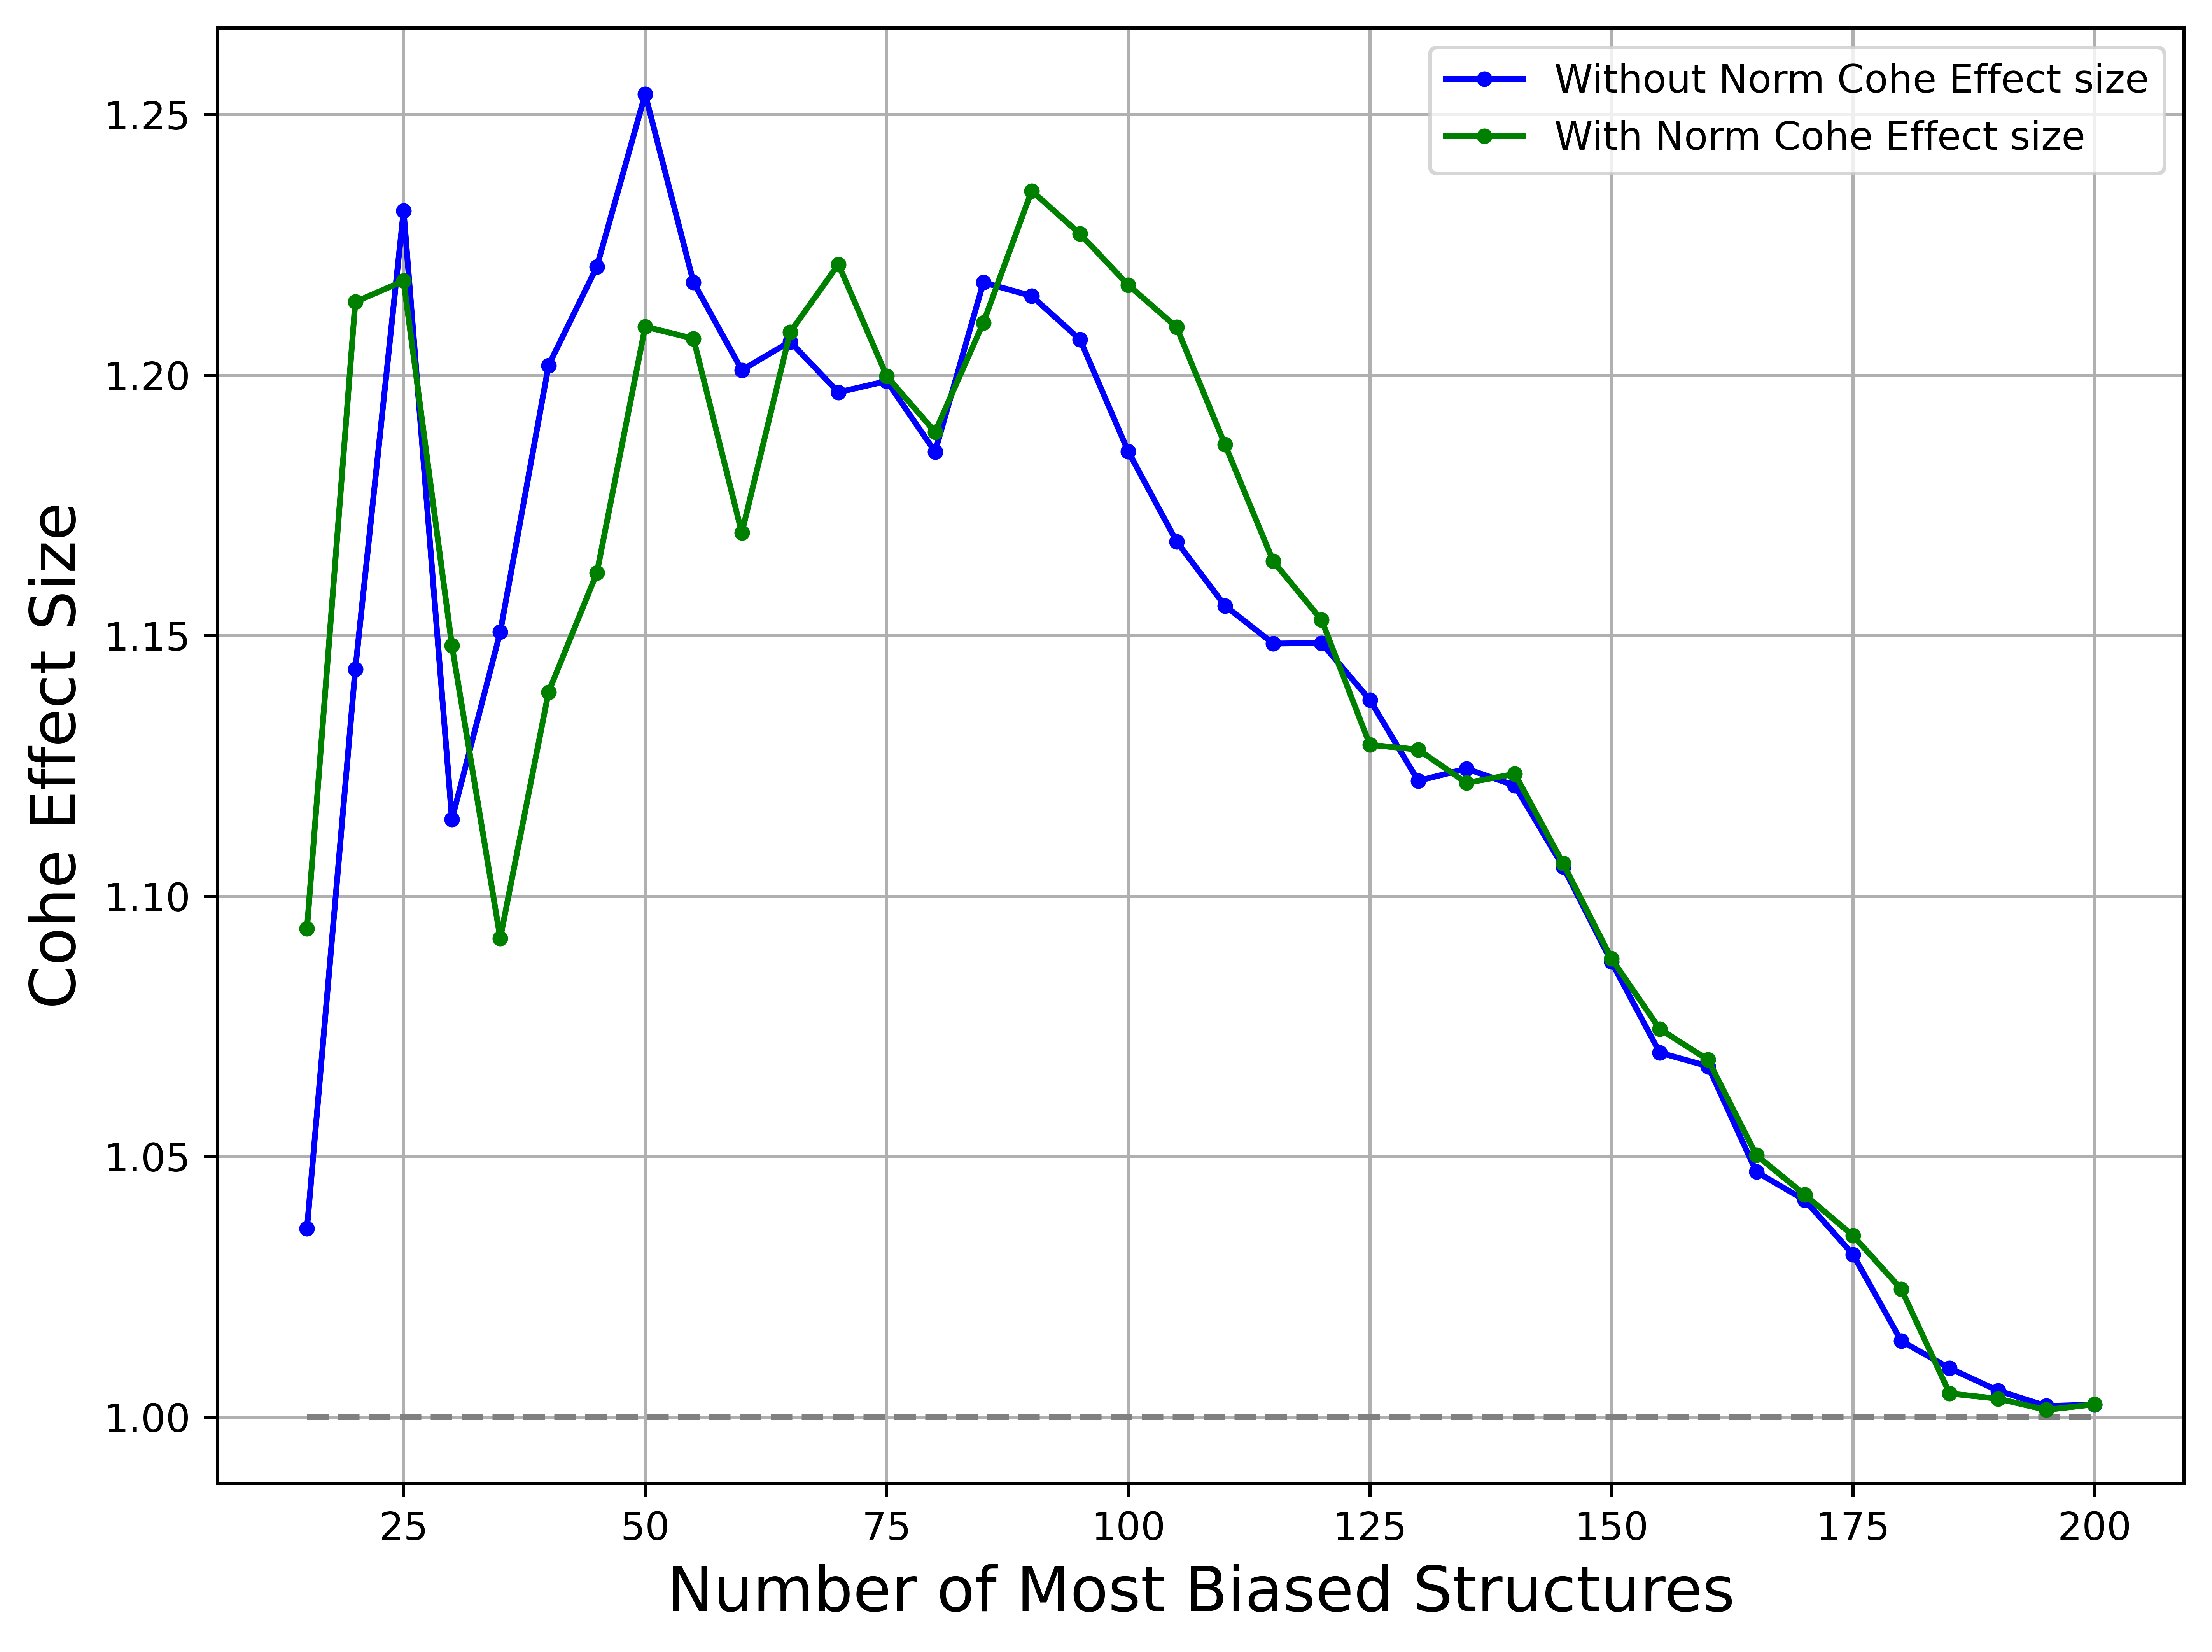

In [58]:
ASD_Conn_P = np.array(ASD_Conn_P)
fig, ax = plt.subplots(dpi=720, figsize=(8,6))

ax.plot(topNs, ASD_Cohe_E, label="Without Norm Cohe Effect size", marker=".", color="blue")
ax.plot(topNs, Sib_Cohe_E, label="With Norm Cohe Effect size", marker=".", color="green")

ax.hlines(xmin=min(topNs), xmax=max(topNs), y=1, ls="--", color="grey")
ax.grid(True)
ax.legend()
ax.set_ylabel("Cohe Effect Size",fontsize=16)
ax.set_xlabel("Number of Most Biased Structures",fontsize=16)


plt.tight_layout()